# analysis of pp-SRC c.m. momentum simulations

# imports

In [35]:
from notebook_tools import *
import matplotlib.patches as patches
%matplotlib inline

# read data

runs 20,000-30,000

sims0 = pd.read_csv( '/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs20000to30000_NsigmaT_10_NSigmaZa1_5_NSigmaZa2_8_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 50,000 to 68,746

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs50000to68746_NsigmaT_15_NSigmaZa1_10_NSigmaZa2_5_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 100,000 to 200800

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs100000to200799_10SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv')

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs600000to6018605_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs700000to756268_100SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)

In [3]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs800000to1000000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_20NRand_results.csv',na_filter=0.0)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,90,97,98,99,100,101,102,103,104,105,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
def draw_PvalWeighting(var='SigmaX', xlabel='',bins=50,target='12C',name='$^{12}C$',
                       PvalTotWeight=None,legend_loc='bbox',                       
                       x_range = None,                       
                       y_range = None,                       
                       xtext = None , ytext=None,                       
                       do_save_fig=False,
                       figsize=(10,10),                       
                       fontsize=20):
    weights=[sims.run/sims.run,sims['Pval'+var+'_weighted_'+target],sims['PvalTotal_unweighted_%s'%target]]#['PvalTotal_%s'%target]]    
    weighting_labels=['generated','weighted by $Pval(\\sigma_{x})$','weighted by $Pval(total)$']   

    if target=='12C' : 
        weights.append(sims.KStPval)
        weighting_labels.append('$KS-p_t$ weighted')
        
    histograms , bins = plot_1d_withoutandwithweight(sims['gen'+var],
                                                     weights=weights,
                                                     weighting_labels = weighting_labels,
                                                     bins=bins,
                                                     legend_loc=legend_loc,
                                                     xlabel=xlabel,
                                                     ylabel='1k runs weighted [a.u.]',
                                                     x_range=x_range,                                                    
                                                     y_range=y_range,
                                                    figsize=figsize,
                                                    fontsize=fontsize);
    do_show_gaussians = [False , True , True , False]
    
    for hw,weight,weighting_label,do_show_gaussian in zip(histograms,weights,weighting_labels,do_show_gaussians):
        mu = np.average(sims['gen'+var] , weights=weight)
        variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
        sigma = np.sqrt(variance)                                                                           
        print weighting_label + ': \n mean=%.3f , stdev=%.3f'%(mu,sigma)
    
    if do_save_fig: 
        plt.text(0.26,0.7*np.max(histograms),name,fontsize=40)
        plt.tight_layout()
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/AcceptanceCorrection'+var+'_'+target+'.pdf')
    
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 ,
                          weights=None, w_label=None , cmap='Greys' ,
                          xlabel=None , ylabel=None ,                         
                          figsize=(10,10), title=None, do_save_fig=False):
    fig,ax=plt.subplots(figsize=figsize)
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights,cmap=cmap);
    ax.add_patch( patches.Rectangle((np.min(df[v1]), np.min(df[v2])),
                                     np.max(df[v1])-np.min(df[v1]) ,
                                     np.max(df[v2])-np.min(df[v2]),        
                                     fill=False
                                    ))
    ax.set_xlim(0.9*np.min(df[v1]),1.1*np.max(df[v1]))
    ax.set_ylim(0.9*np.min(df[v2]),1.1*np.max(df[v2]))

    plt.colorbar()
    set_axes( ax , xlabel , ylabel , fontsize=30)
    if do_save_fig: 
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/AccCorr_'+v1+'_'+v2+'_'+w_label+'.pdf')
        

    
    
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              w_labels=None,
                              cmaps=None,
                              do_save_fig=False):
    
    for weight,w_label,cmap in zip(weights,w_labels,cmaps):
        print weight , cmap
        title=weight
        weight=sims[weight] if weight is not None else None
        draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap=cmap ,
                              xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title , do_save_fig=do_save_fig);


# histograms of generated, and generated+weighted

generated: 
 mean=0.171 , stdev=0.051
weighted by $Pval(\sigma_{x})$: 
 mean=0.158 , stdev=0.013
weighted by $Pval(total)$: 
 mean=0.154 , stdev=0.016
$KS-p_t$ weighted: 
 mean=0.153 , stdev=0.016
generated: 
 mean=0.171 , stdev=0.051
weighted by $Pval(\sigma_{x})$: 
 mean=0.149 , stdev=0.025
weighted by $Pval(total)$: 
 mean=0.149 , stdev=0.022


TypeError: cannot concatenate 'str' and 'float' objects

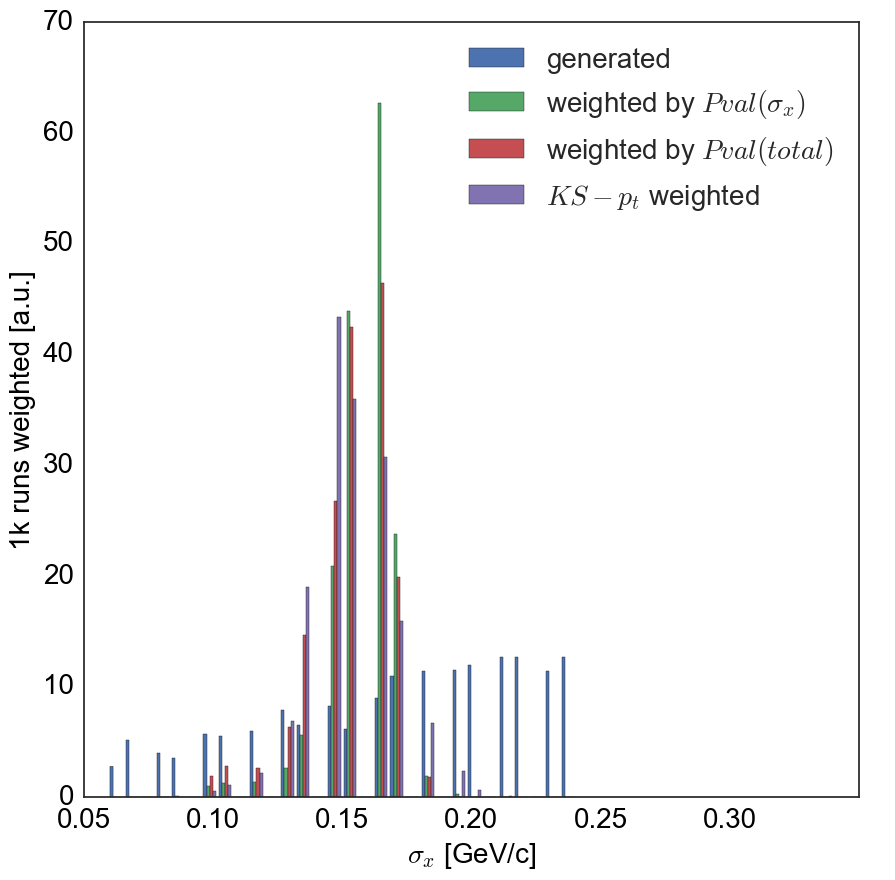

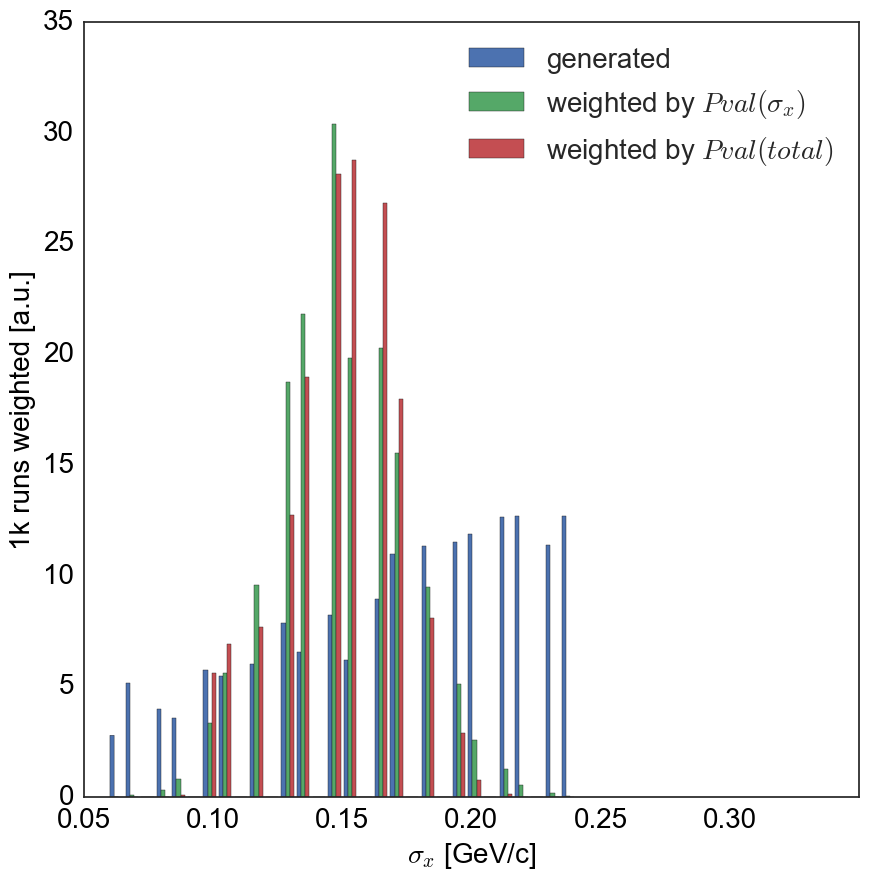

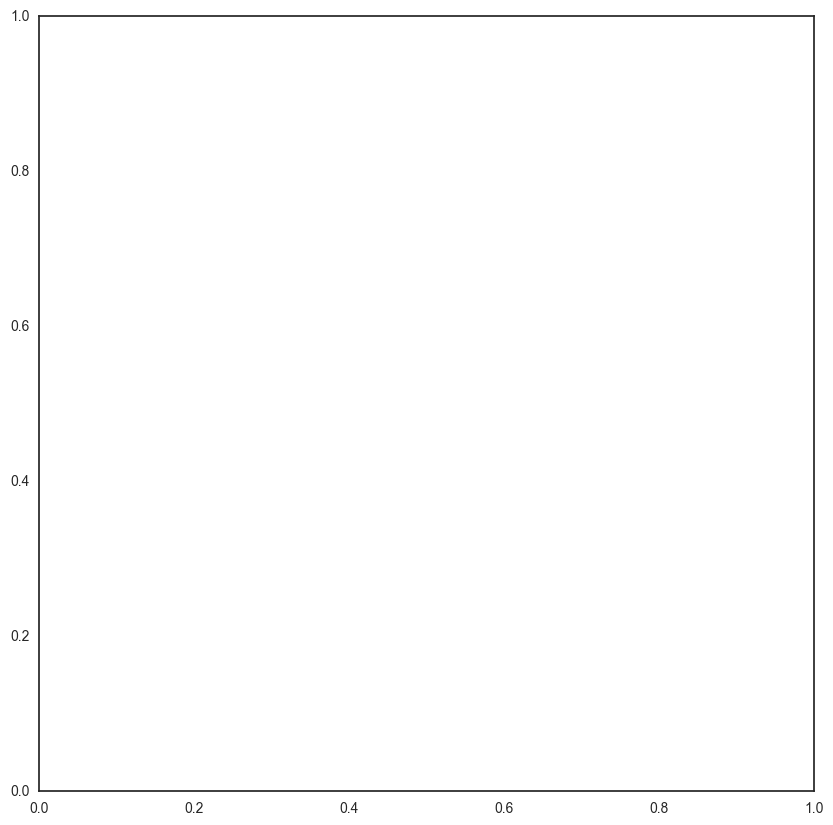

In [5]:
for target,name in zip(['12C','27Al','56Fe','208Pb'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    draw_PvalWeighting(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=30,x_range=(0.05,0.35),
                       target=target,name=name,
                       legend_loc='upper right',do_save_fig=False)

In [42]:

def plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]',binsy=30,
                                      v1='SigmaX',xlabel='$\\sigma_{x}$ [Gev/c]', binsx=30,
                                      target='12C',do_save_fig=False): 
    weights = [None , 'PvalSigmaT%s_%s'%(v2,target) , 'PvalTotal_unweighted_%s'%target  ]
    w_labels = ['NoWeights','PvalSigmaT%s_%s'%(v2,target),'PvalTotal_%s'%target]
    cmaps = ['hot_r','hot_r','hot_r','hot_r']

    draw_all_PvalWeighting_2d(v1=v1 , v2=v2 ,
                              xlabel=xlabel,ylabel=ylabel ,
                              bins=(binsx,binsy),
                              figsize=(15,10),
                              weights=weights, 
                              w_labels=w_labels,
                              cmaps=cmaps,
                              do_save_fig=do_save_fig)

None hot_r
PvalSigmaTSigmaZa1_12C hot_r
PvalTotal_unweighted_12C hot_r
None hot_r
PvalSigmaTSigmaZa2_12C hot_r
PvalTotal_unweighted_12C hot_r
None hot_r
PvalSigmaTMeanZa1_12C hot_r
PvalTotal_unweighted_12C hot_r
None hot_r
PvalSigmaTMeanZa2_12C hot_r
PvalTotal_unweighted_12C hot_r


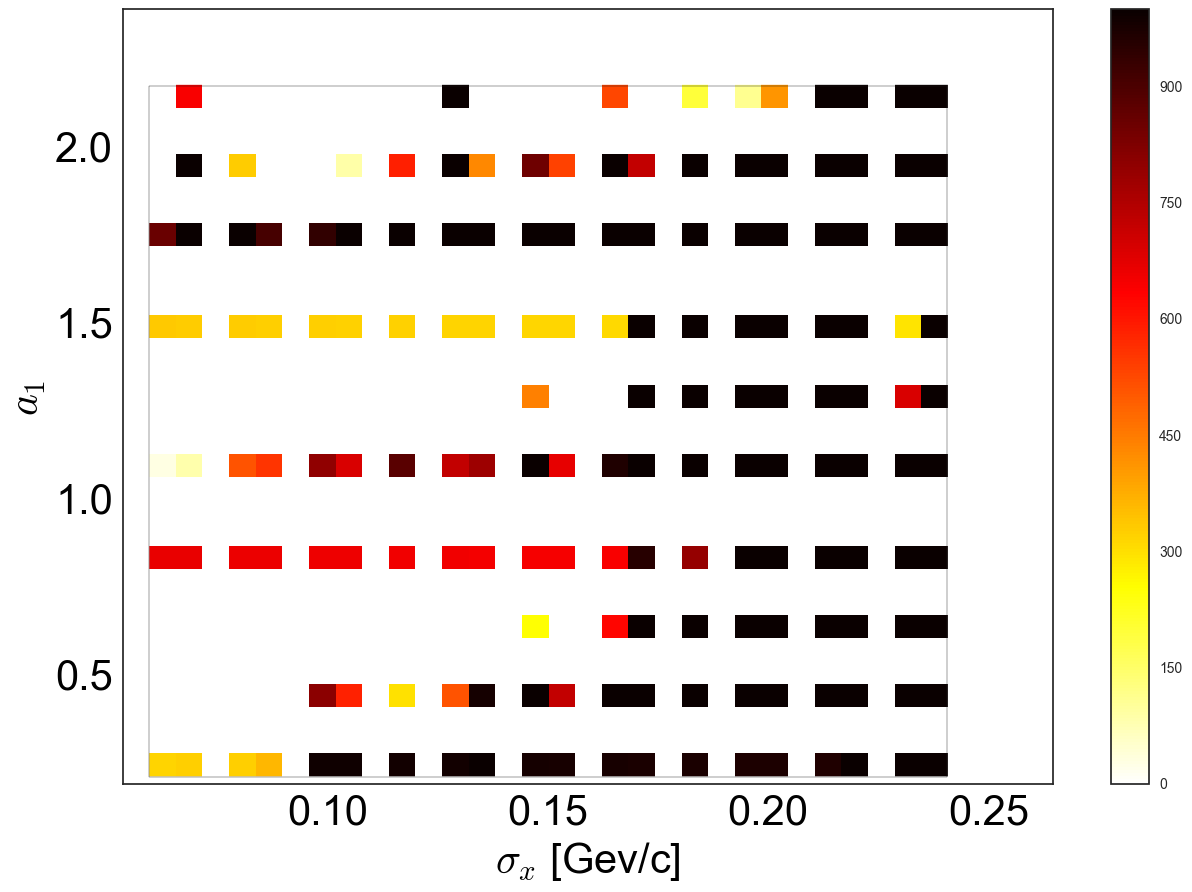

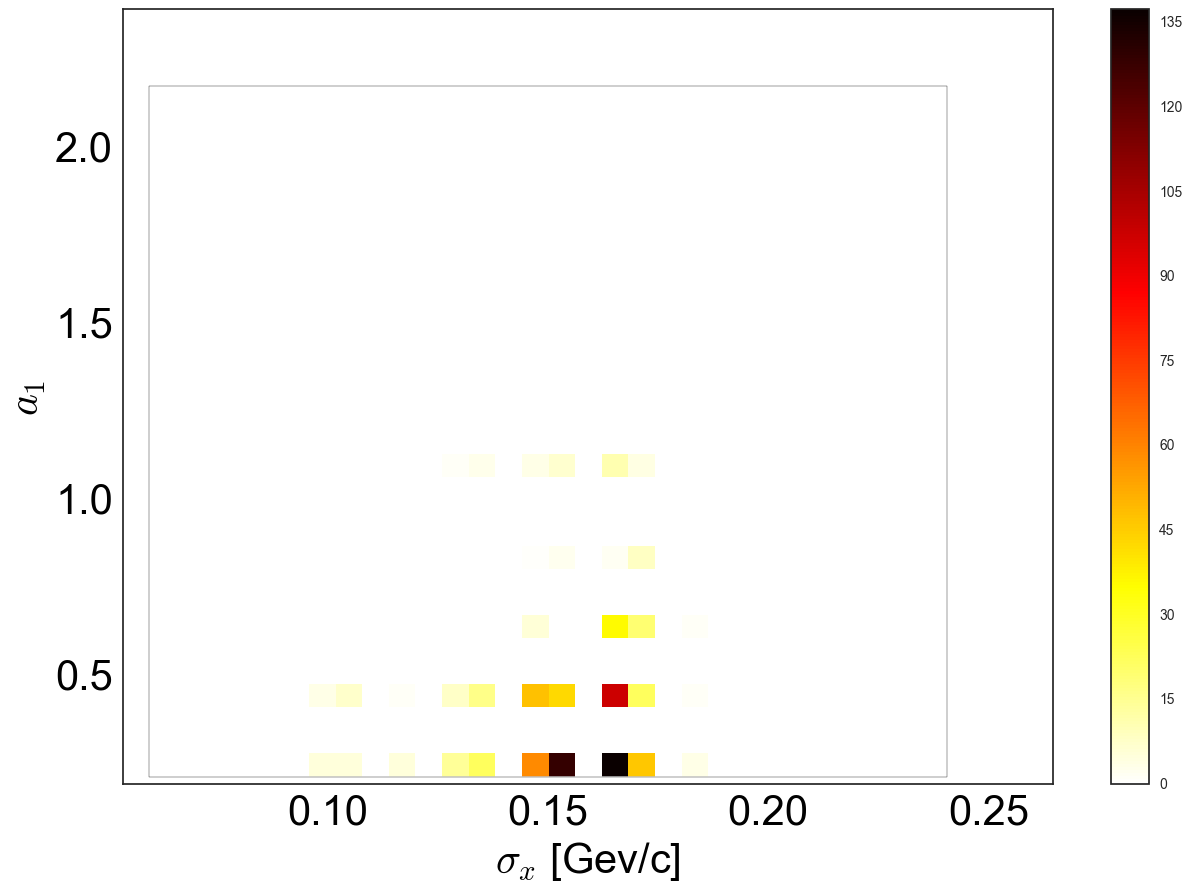

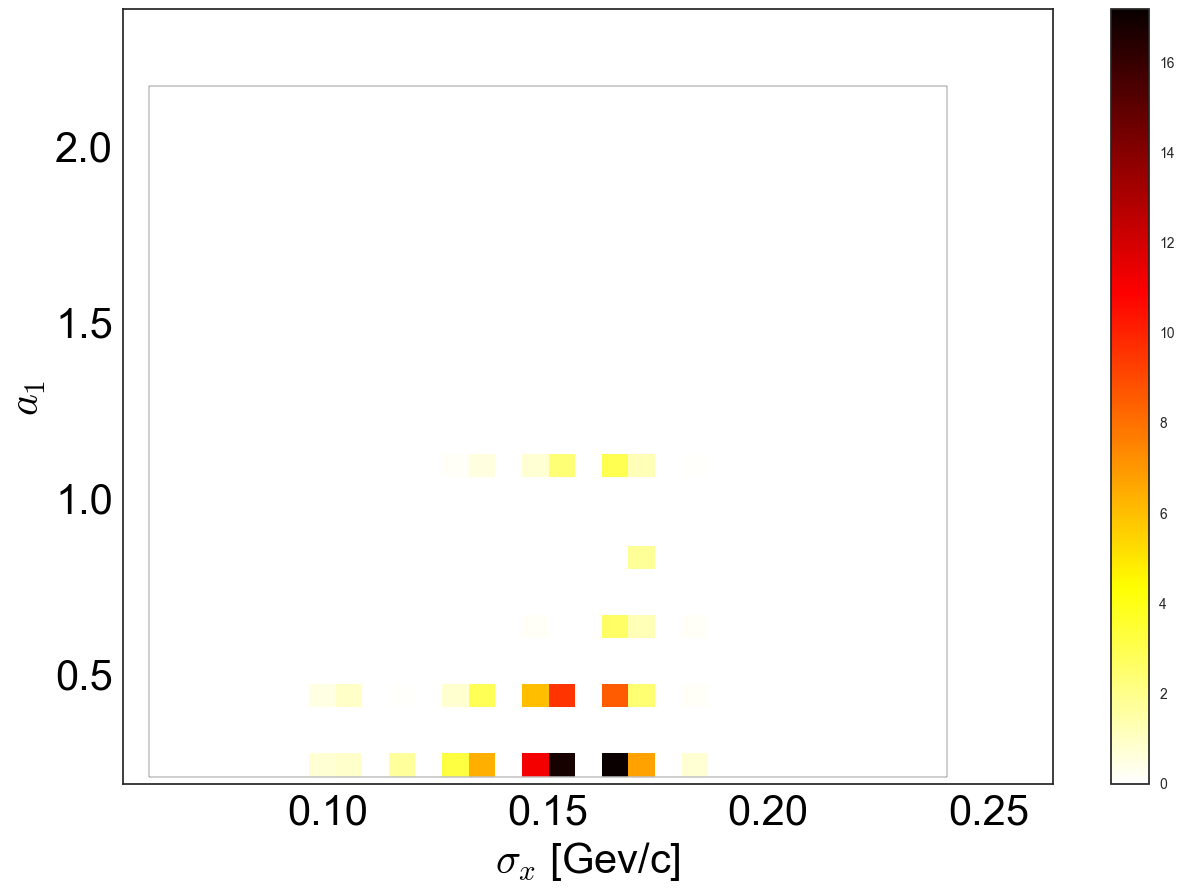

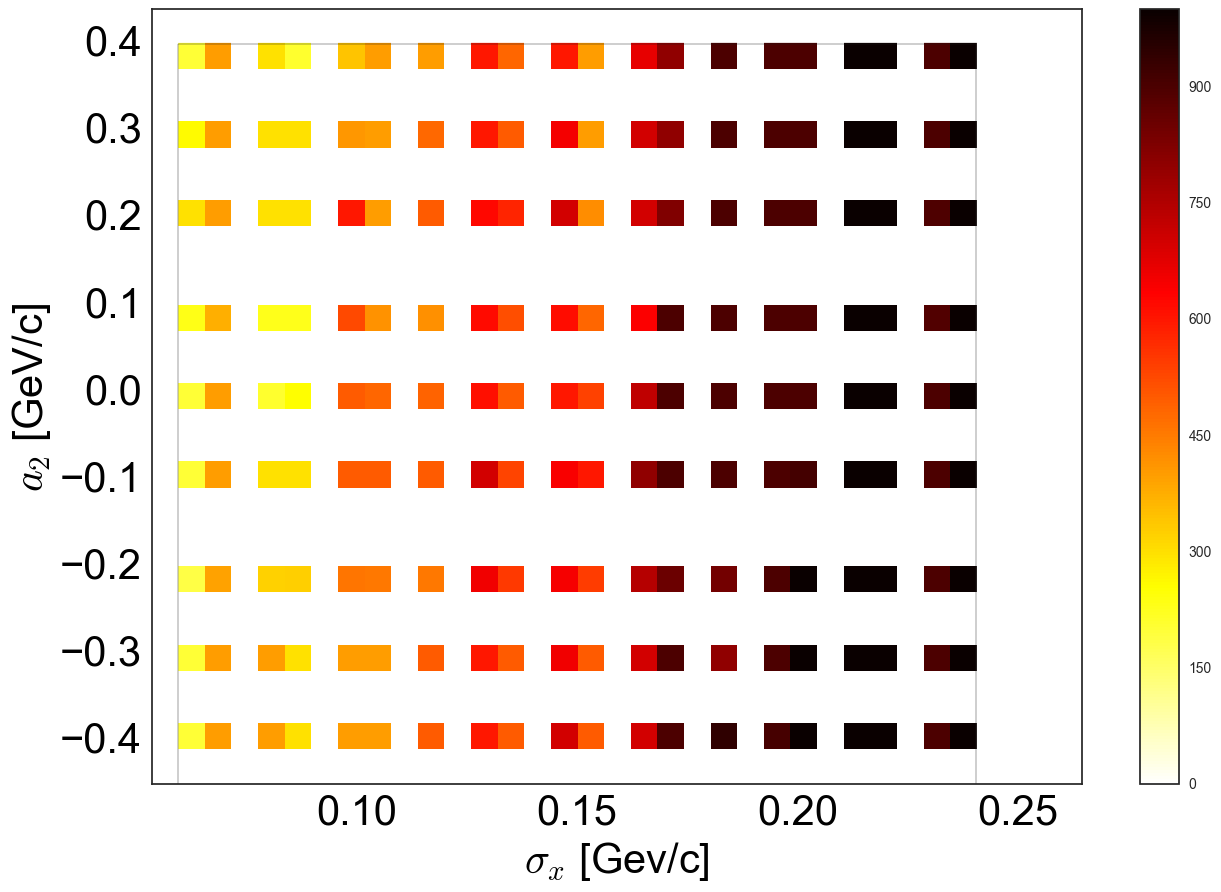

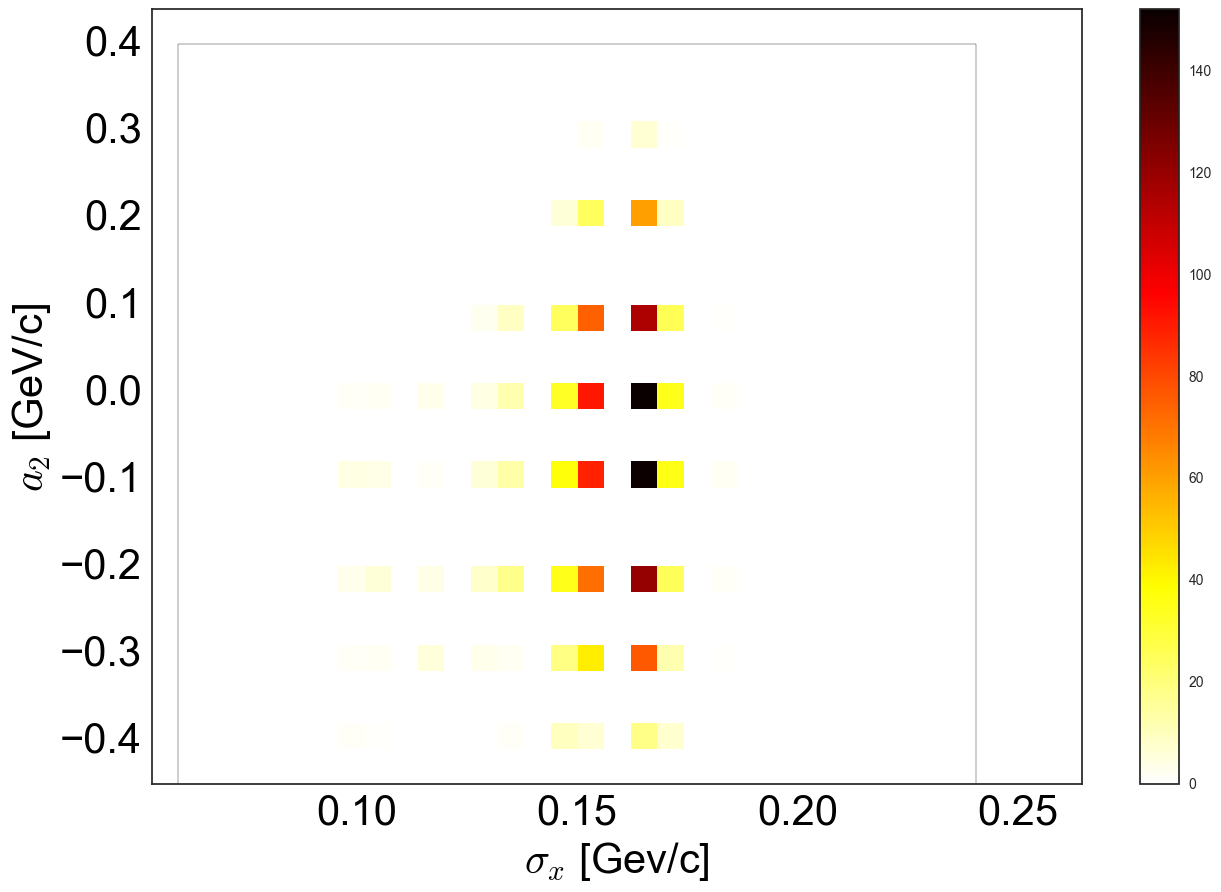

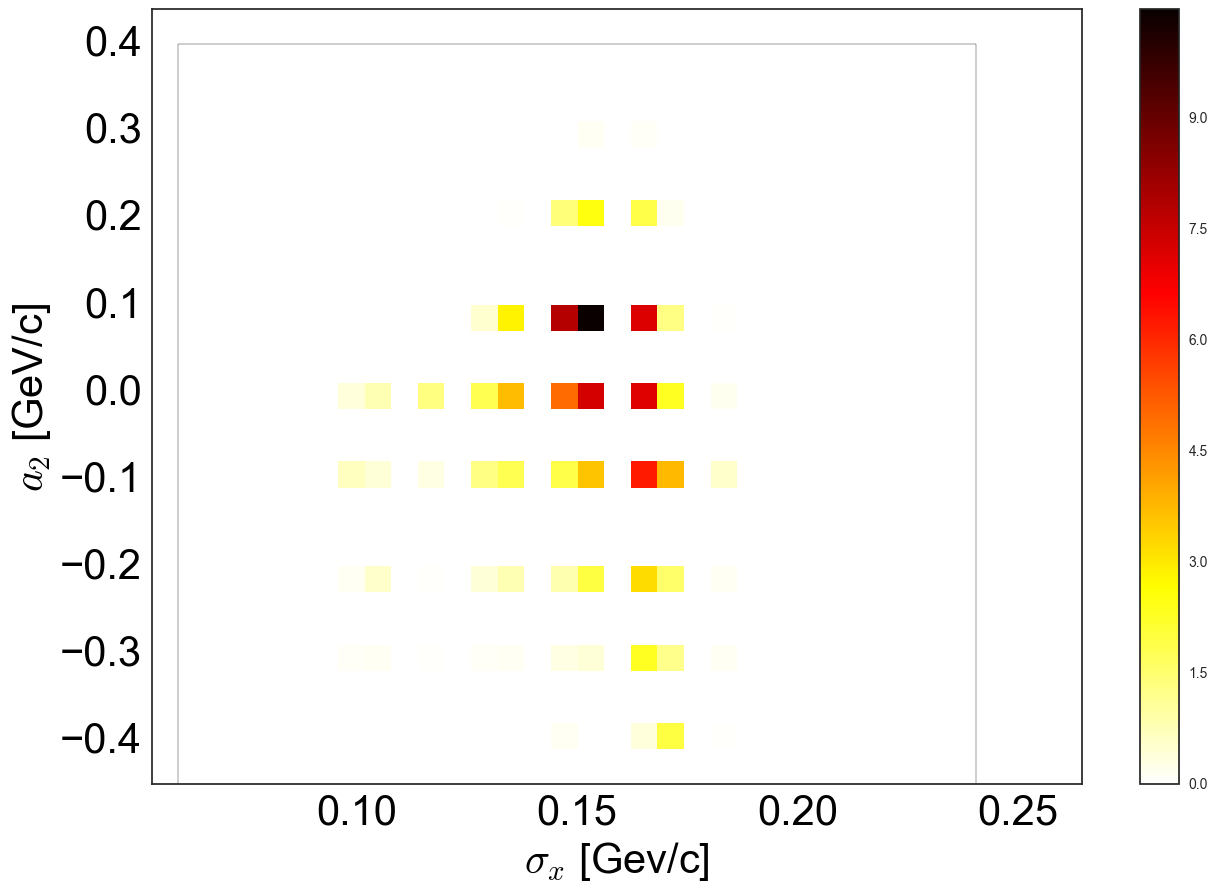

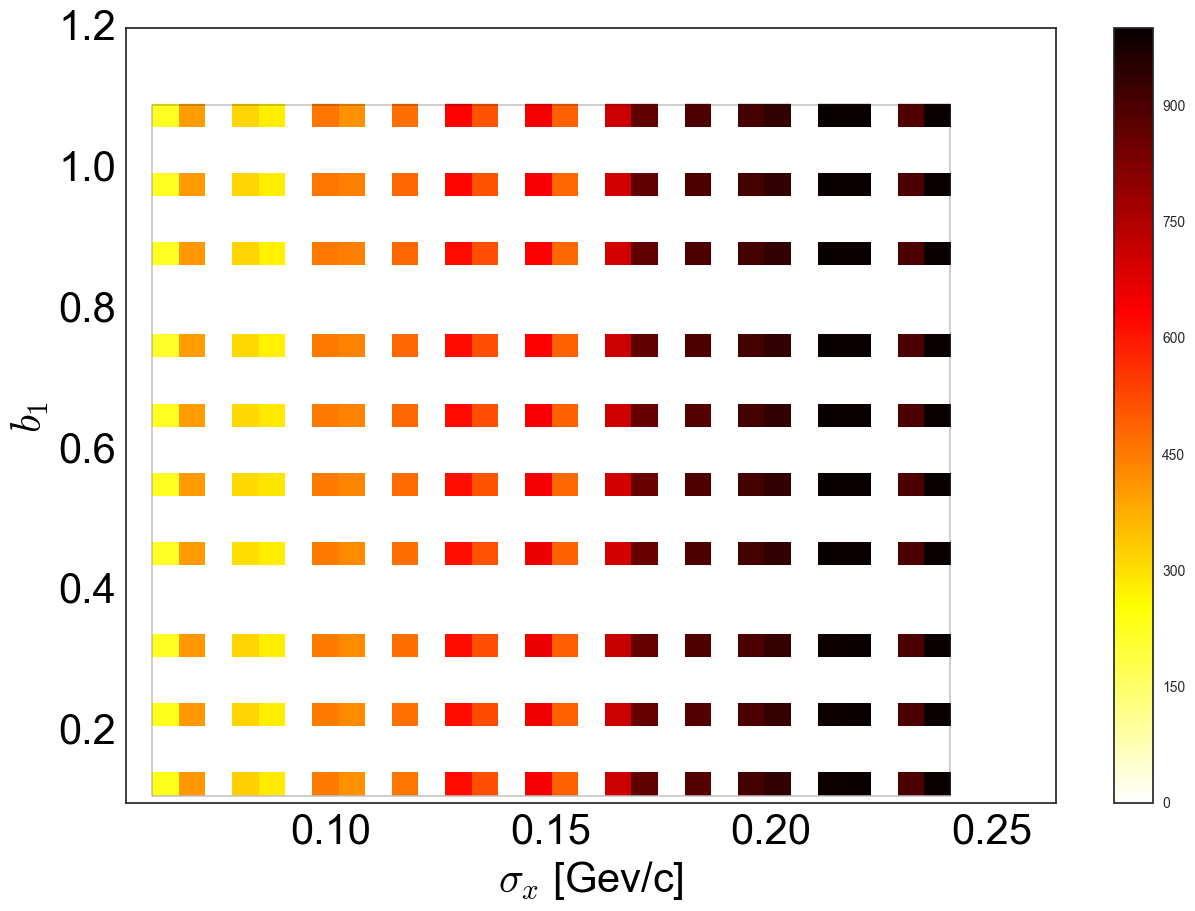

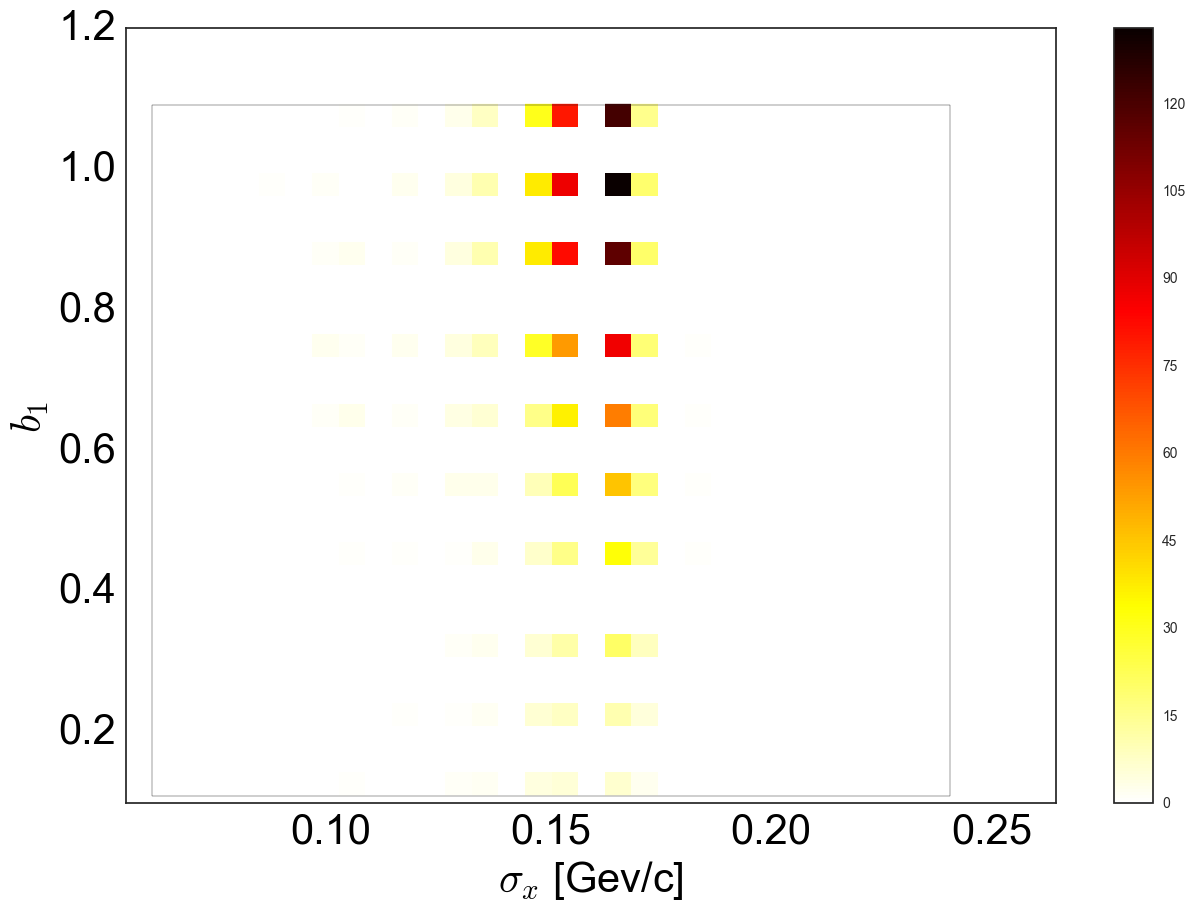

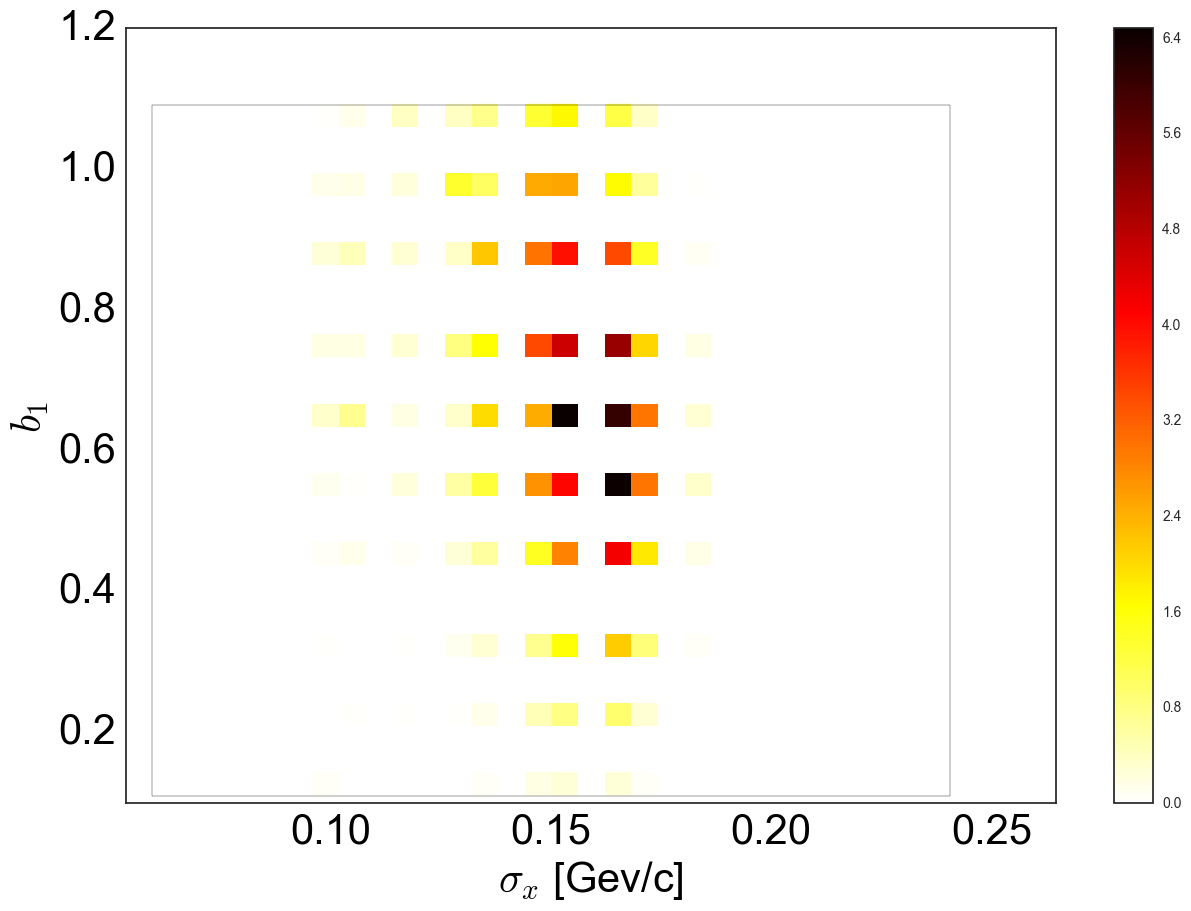

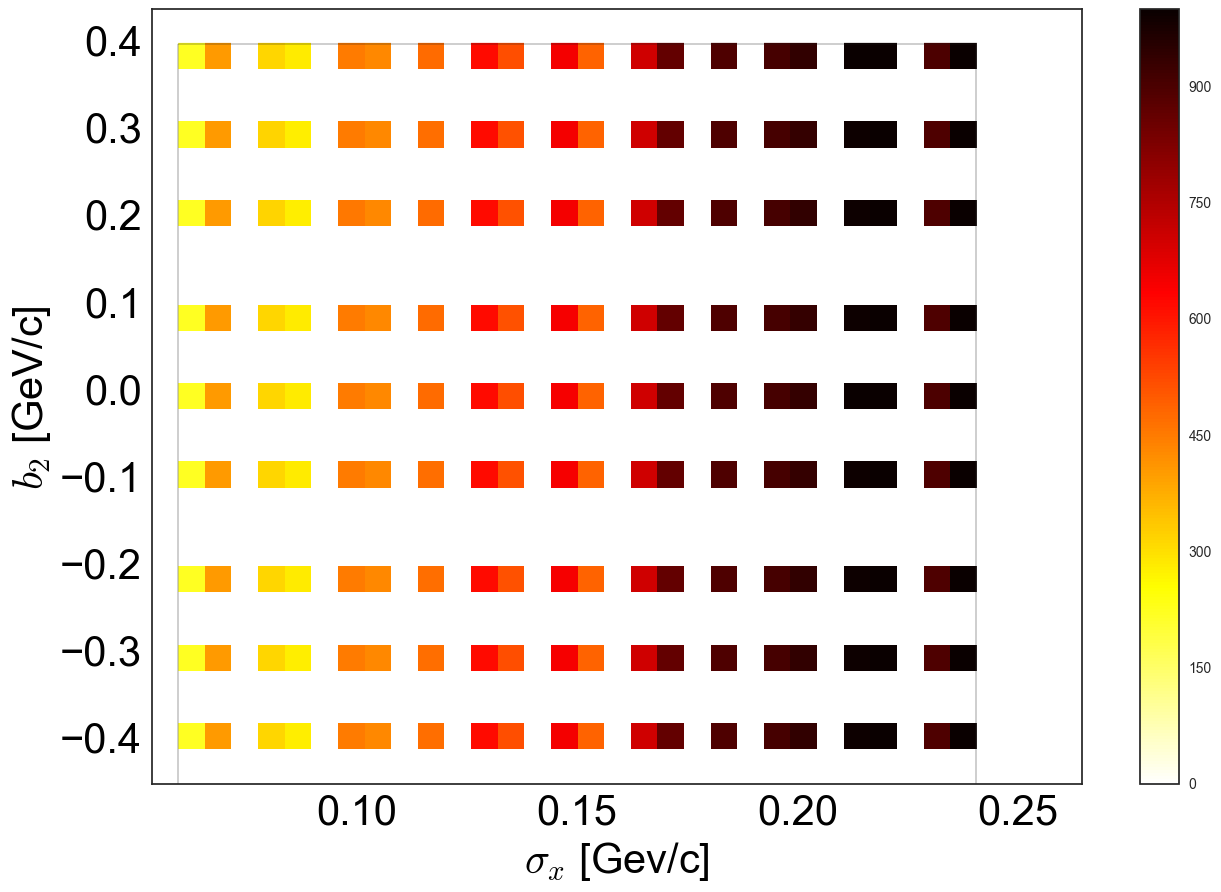

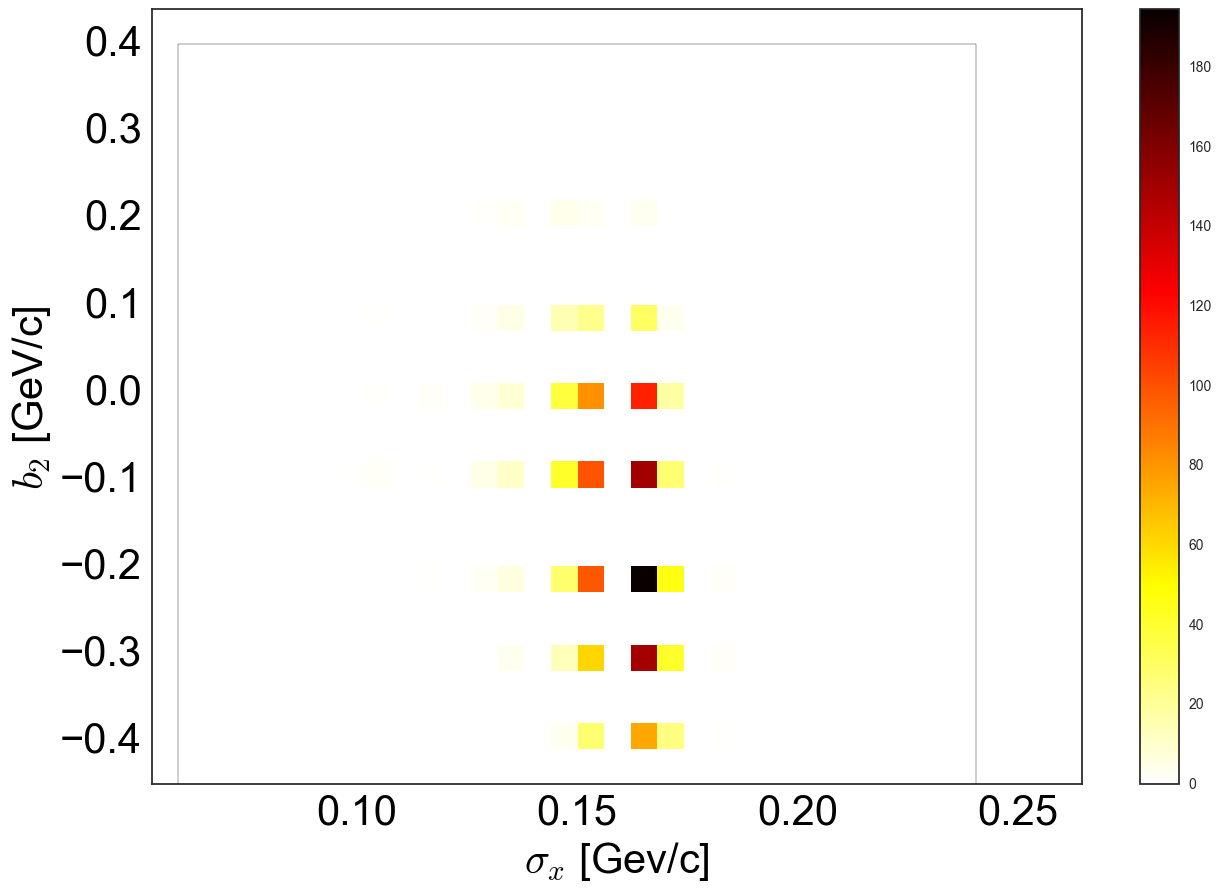

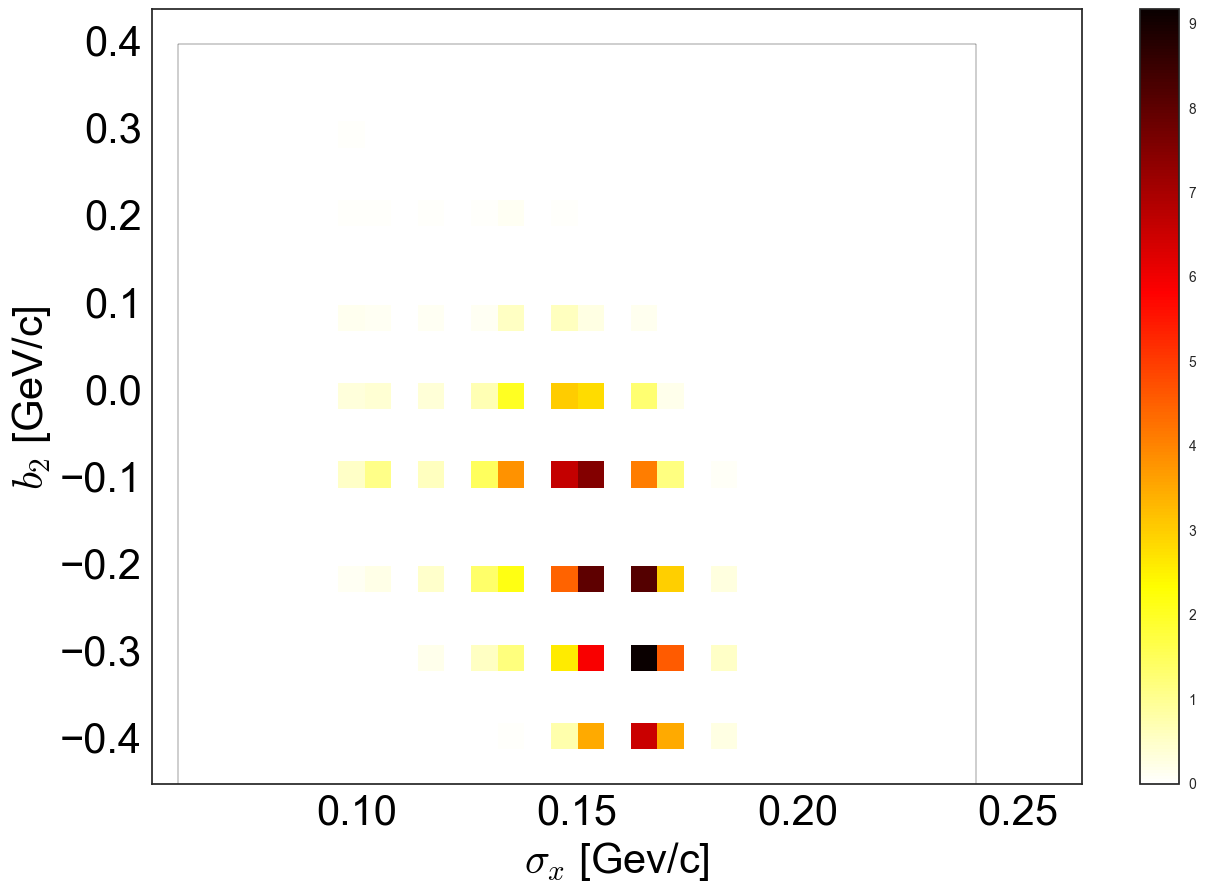

In [46]:
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',do_save_fig=False)
plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',do_save_fig=False)
plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',do_save_fig=False)
plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',do_save_fig=False)


variable "plt" not defined.

variable "plt.color" not defined.


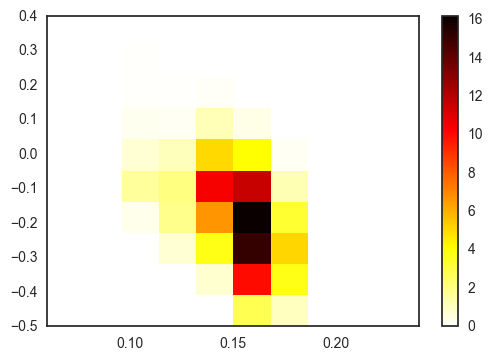

In [19]:
# plt.hist2d(sims.genSigmaX,sims.genMeanZa1,weights=sims.PvalTotal_unweighted_12C,cmap='hot_r');
plt.hist2d(sims.genSigmaX,sims.genMeanZa2,weights=sims.PvalTotal_unweighted_12C,cmap='hot_r');
plt.colorbar();

None hot_r
PvalSigmaTSigmaZa1_27Al hot_r
PvalTotal_unweighted_27Al hot_r
None hot_r
PvalSigmaTSigmaZa2_27Al hot_r
PvalTotal_unweighted_27Al hot_r
None hot_r
PvalSigmaTMeanZa1_27Al hot_r
PvalTotal_unweighted_27Al hot_r
None hot_r
PvalSigmaTMeanZa2_27Al hot_r
PvalTotal_unweighted_27Al hot_r


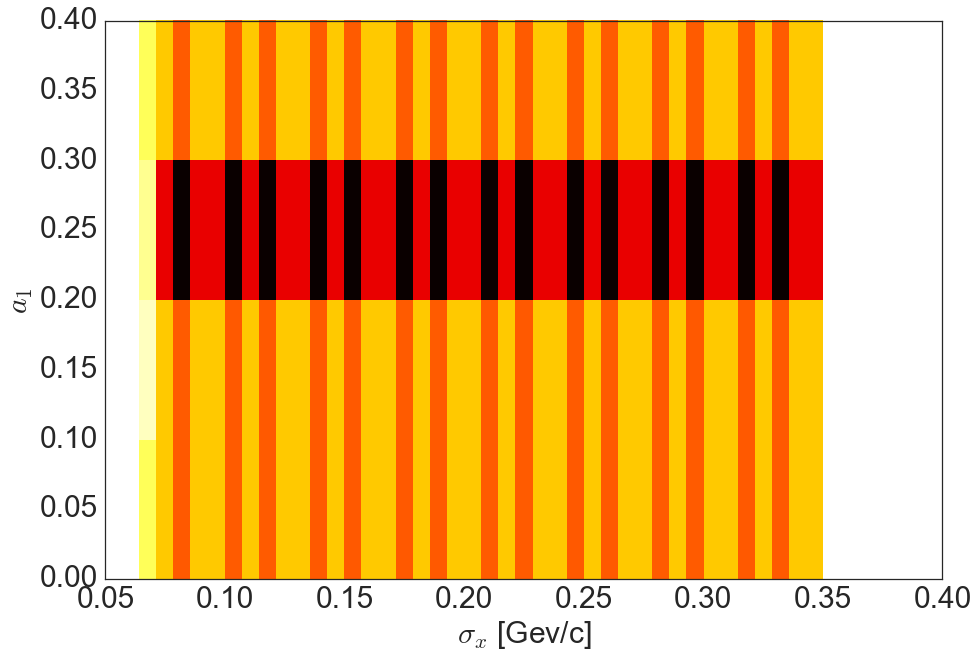

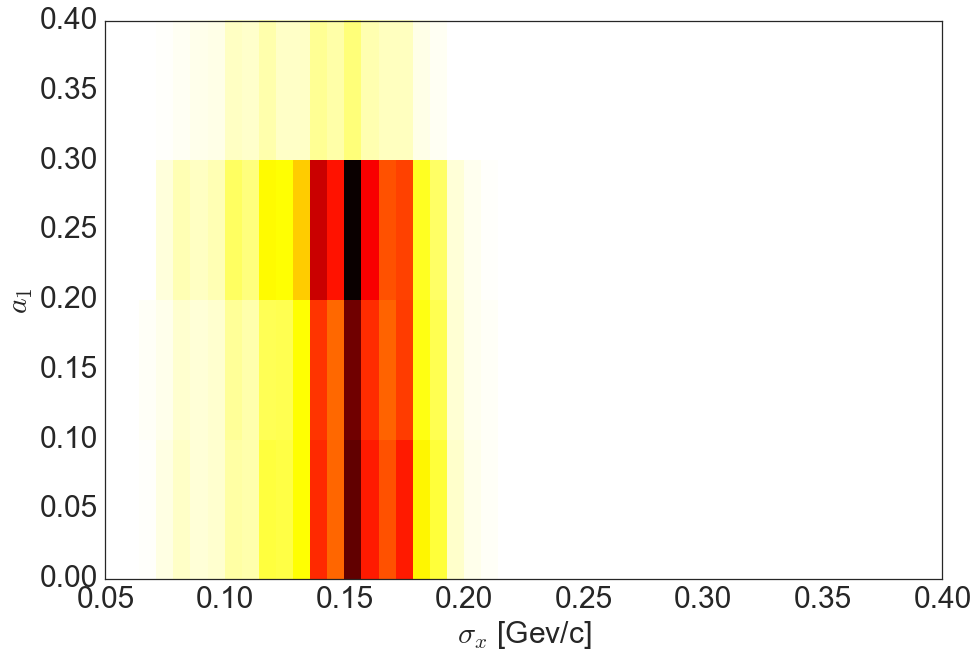

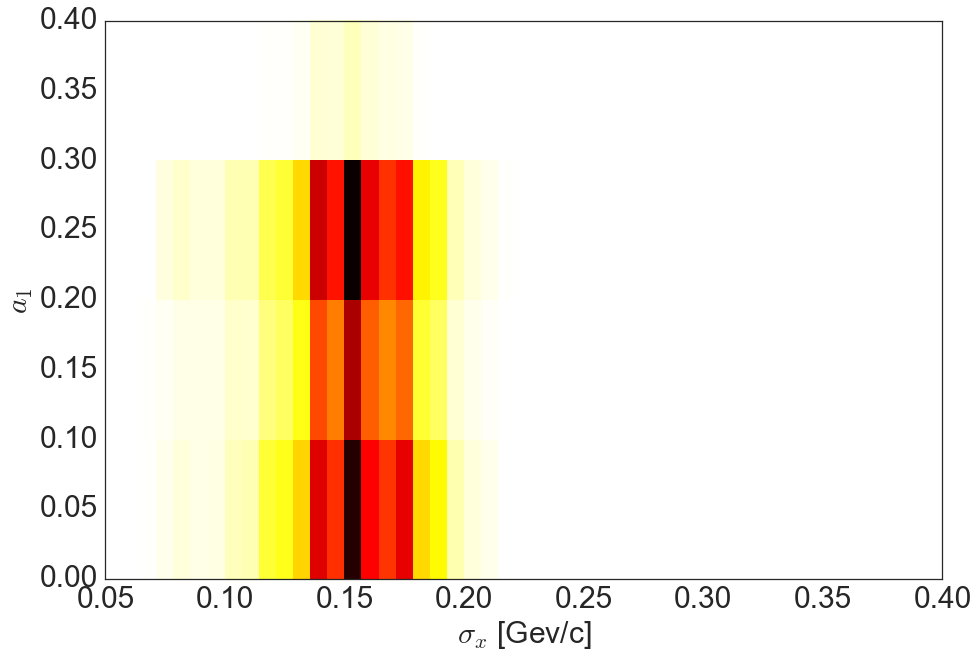

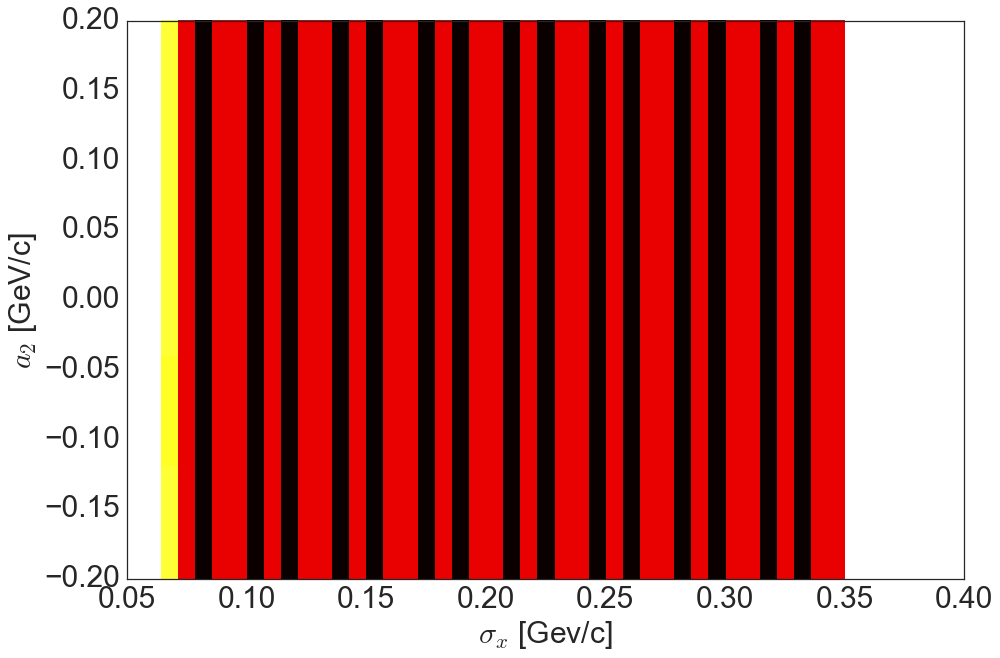

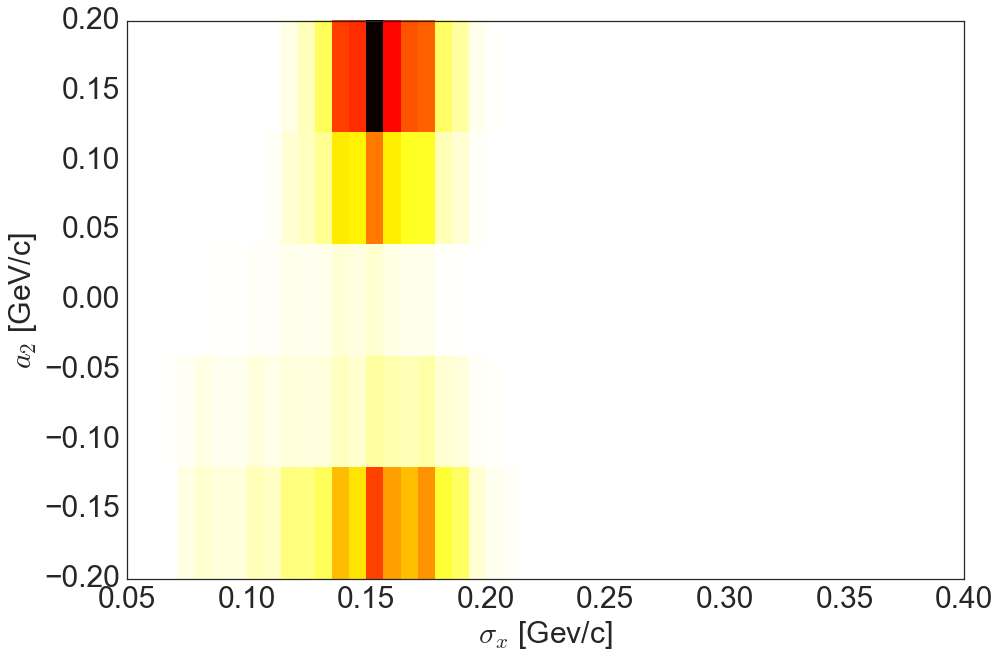

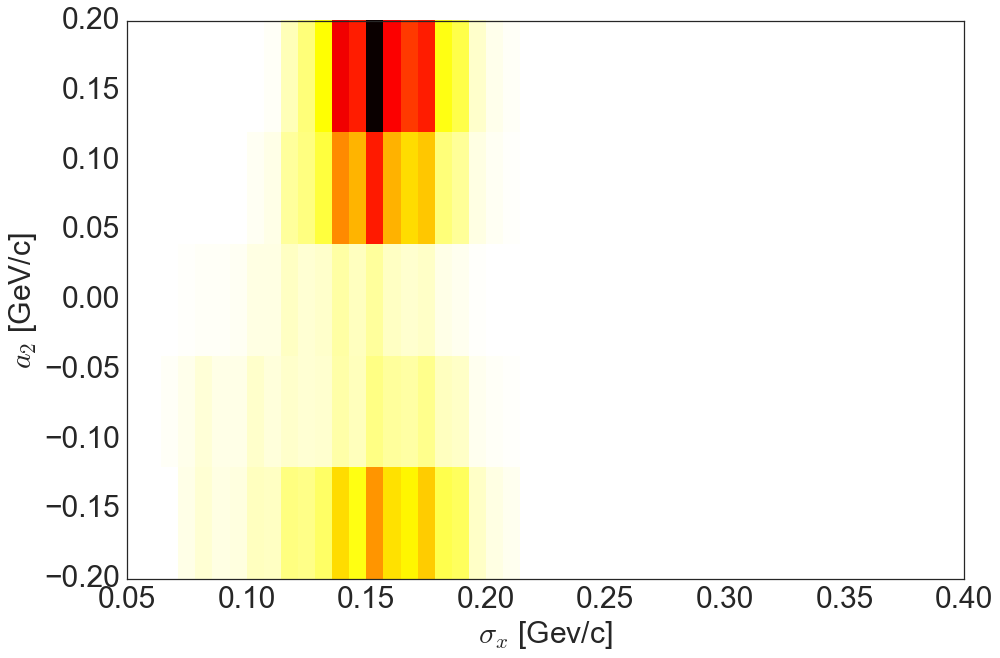

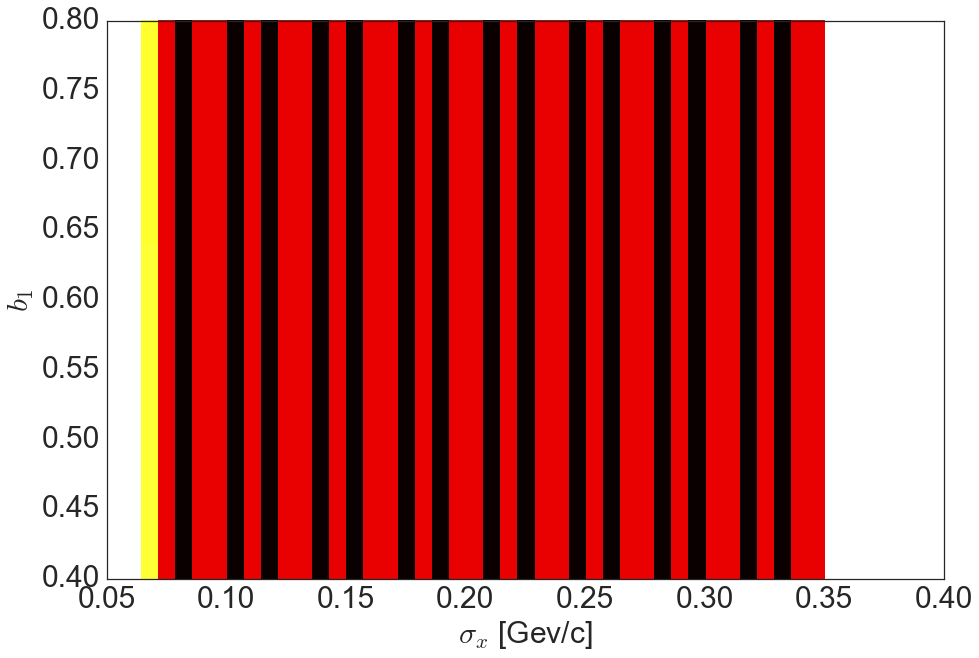

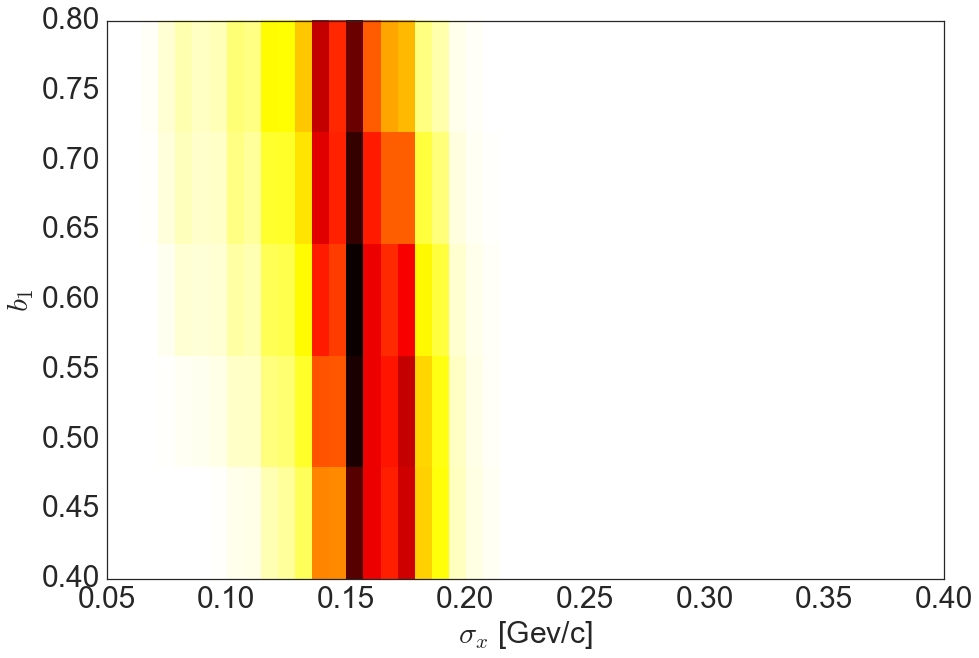

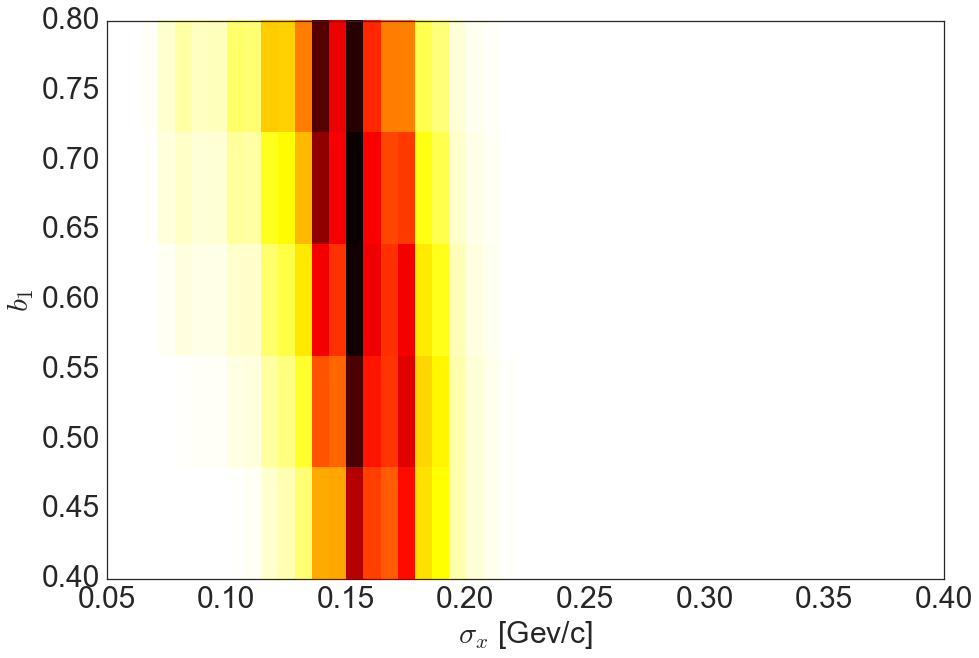

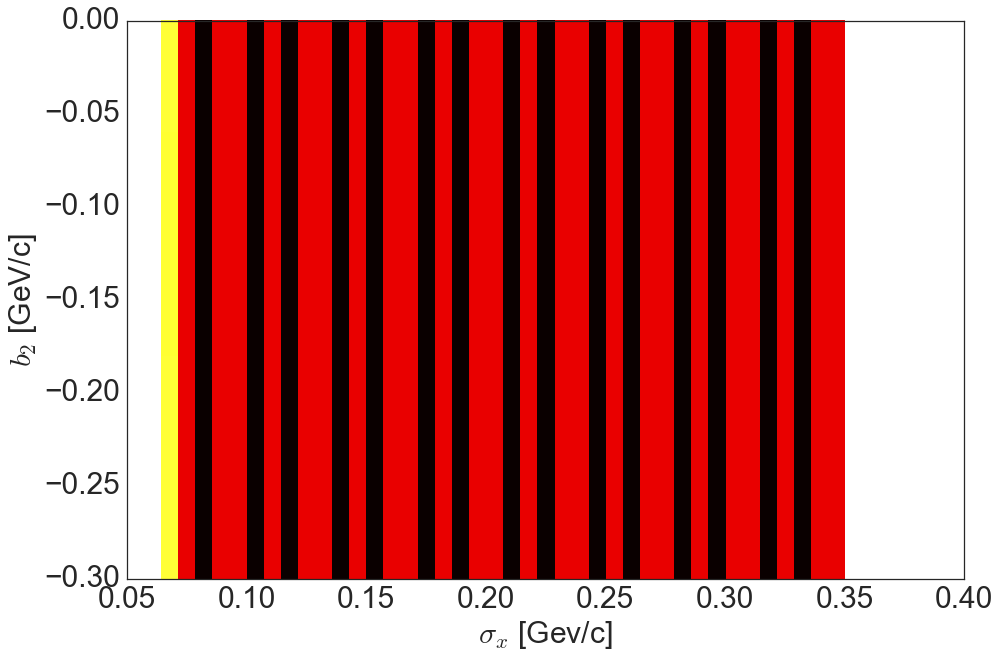

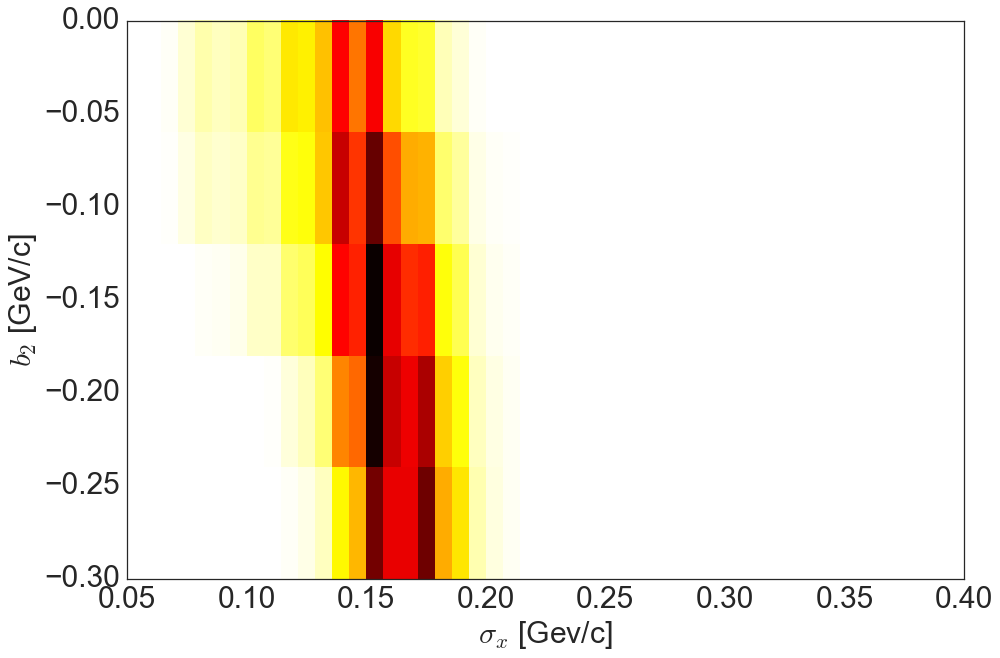

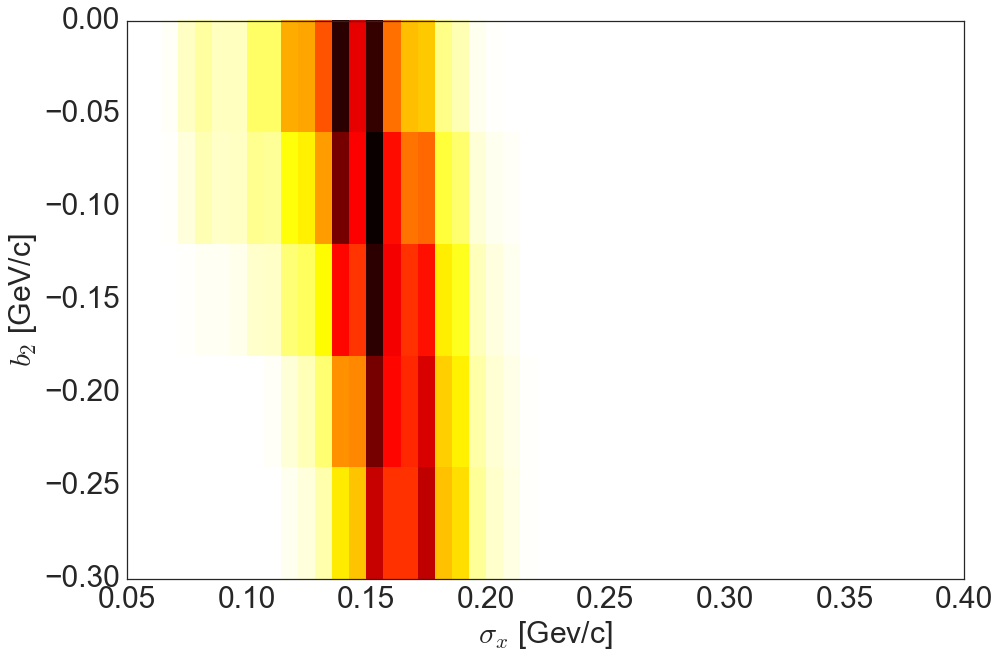

In [5]:
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',target='27Al',binsy=np.linspace(0.,0.4,5),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',target='27Al',binsy=np.linspace(-0.2,0.2,6),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',target='27Al',binsy=np.linspace(0.4,0.8,6),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',target='27Al',binsy=np.linspace(-0.3,0.0,6),do_save_fig=True)

None hot_r
PvalSigmaTSigmaZa1_56Fe hot_r
PvalTotal_unweighted_56Fe hot_r
None hot_r
PvalSigmaTSigmaZa2_56Fe hot_r
PvalTotal_unweighted_56Fe hot_r
None hot_r
PvalSigmaTMeanZa1_56Fe hot_r
PvalTotal_unweighted_56Fe hot_r
None hot_r
PvalSigmaTMeanZa2_56Fe hot_r
PvalTotal_unweighted_56Fe hot_r


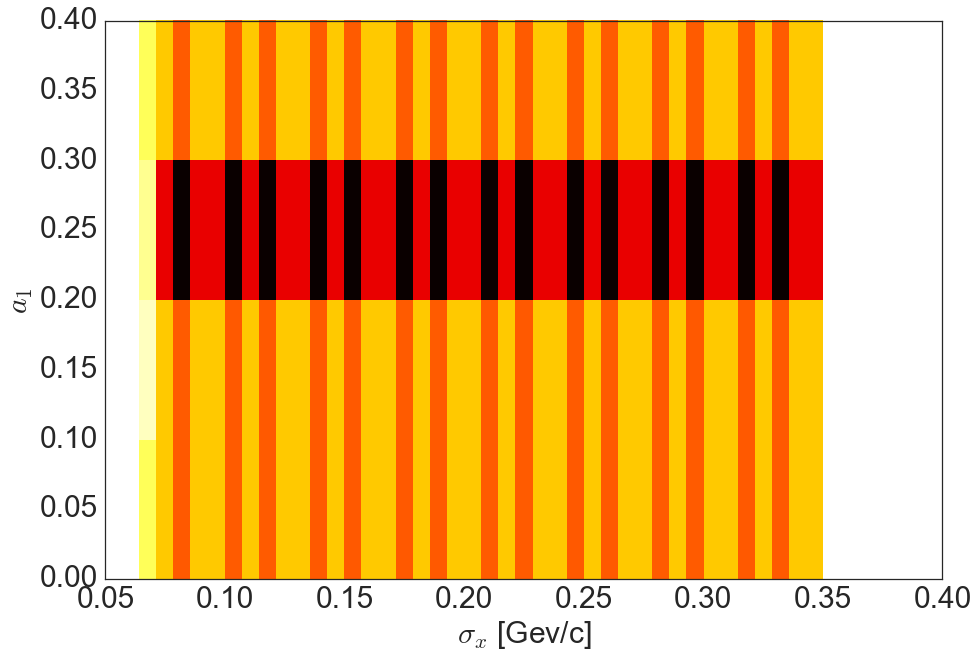

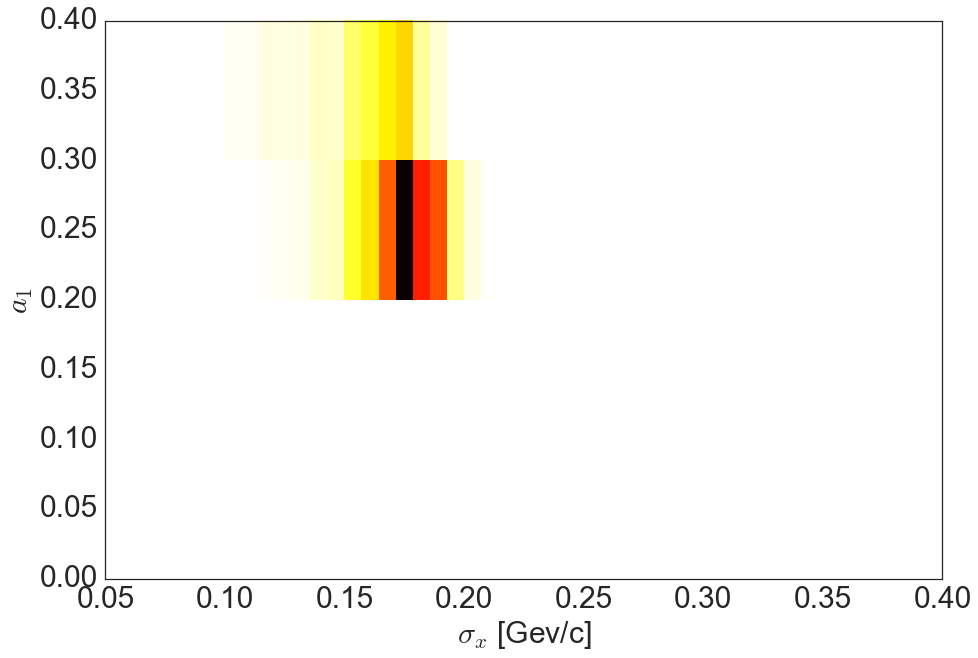

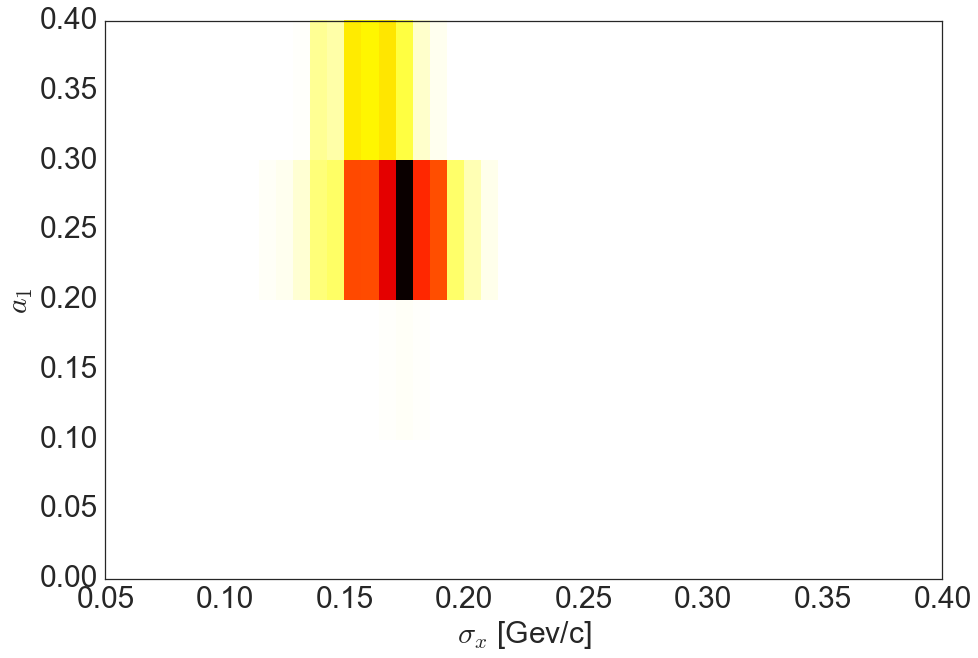

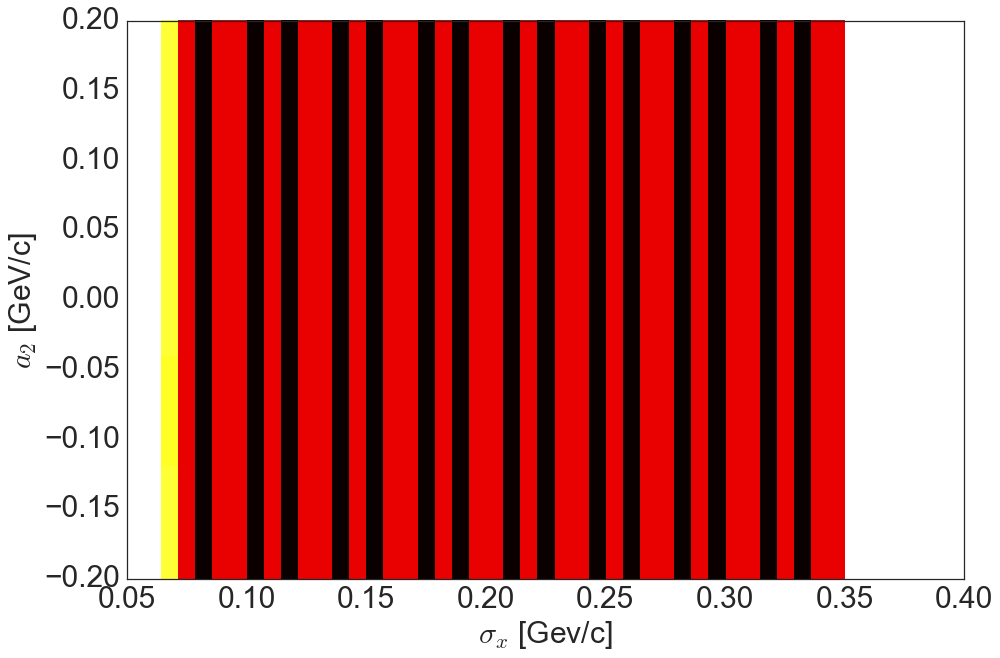

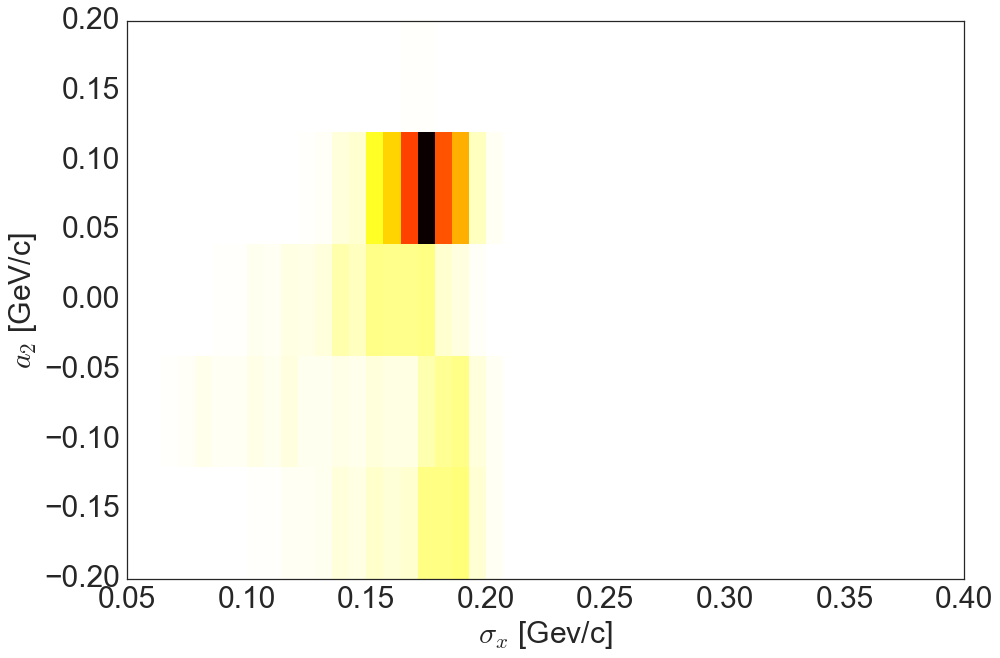

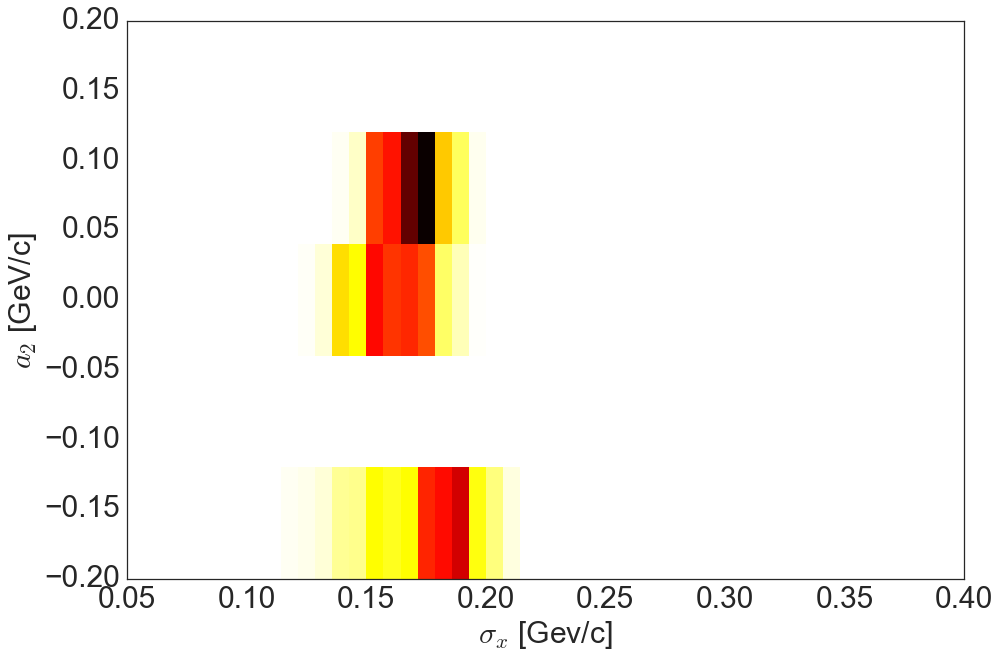

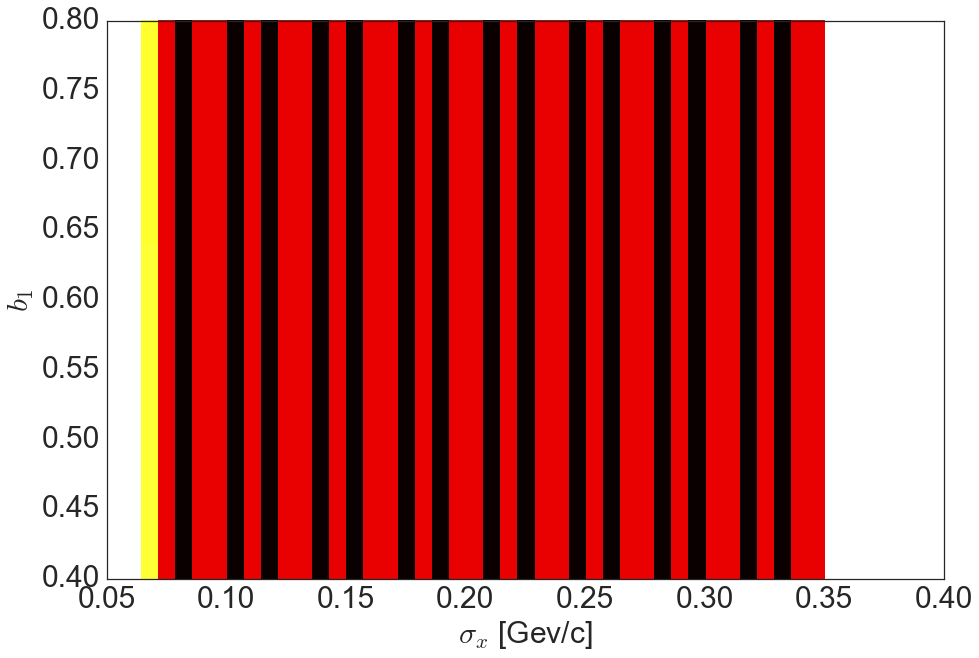

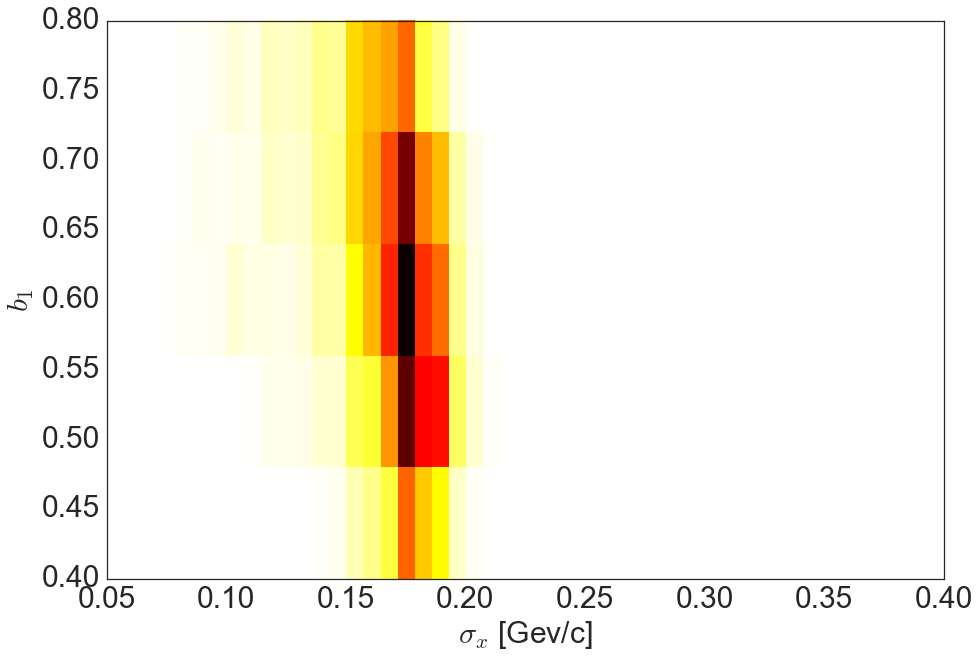

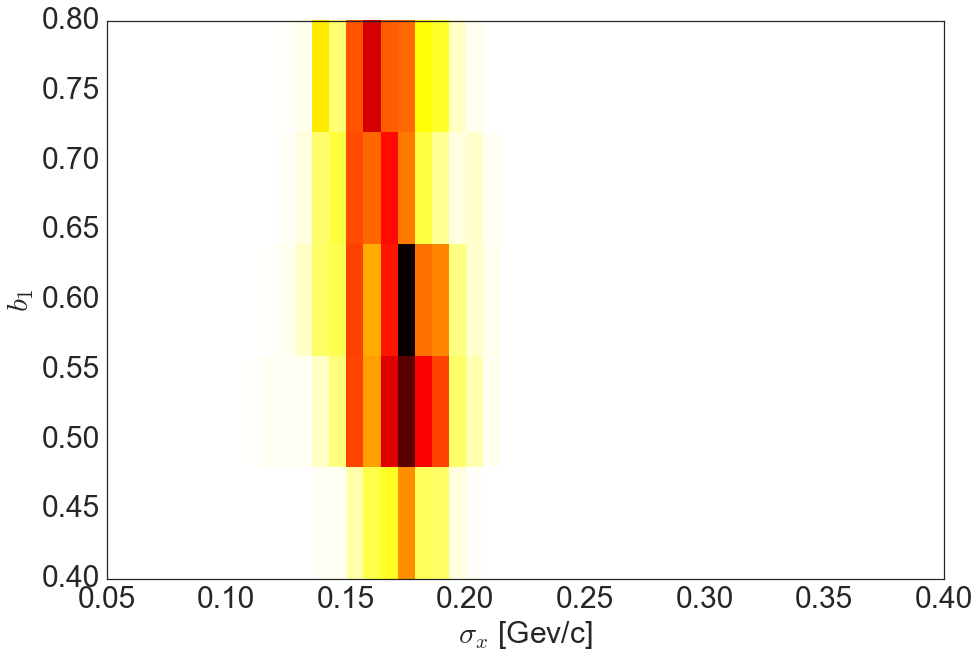

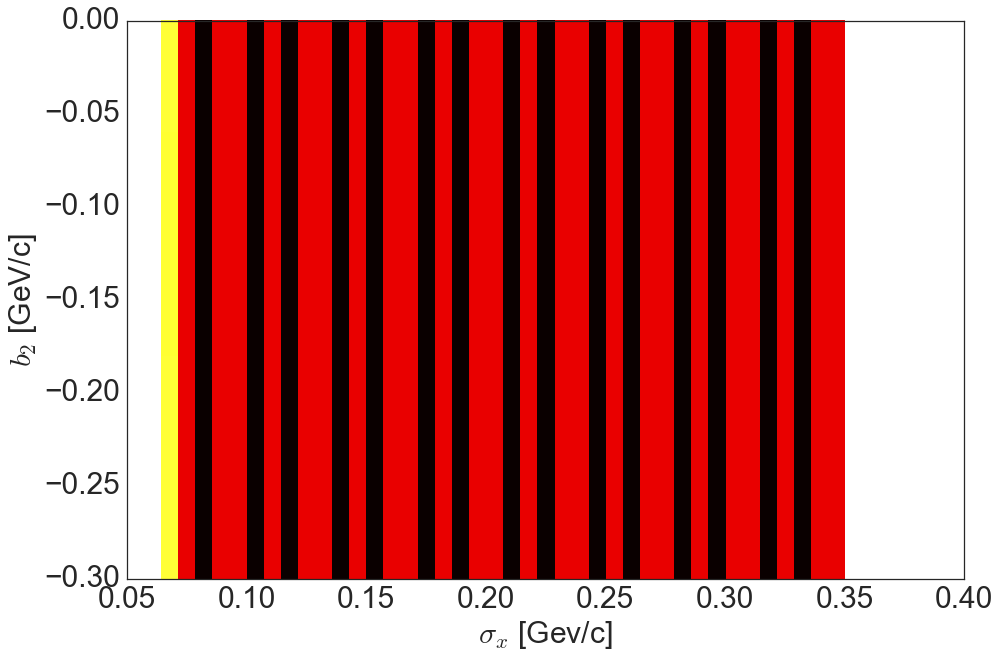

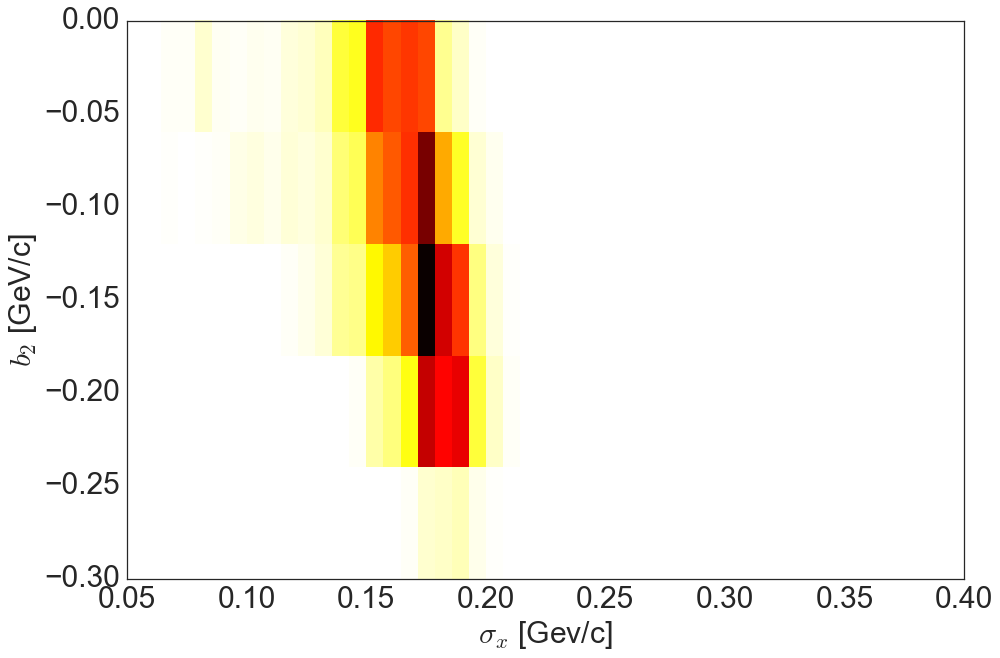

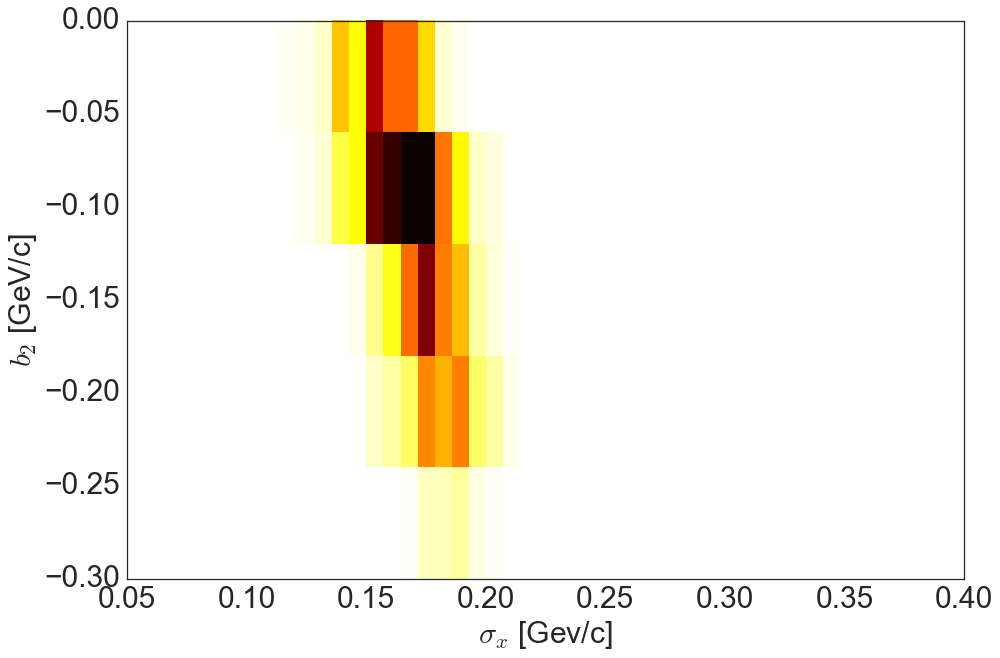

In [6]:
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',target='56Fe',binsy=np.linspace(0.,0.4,5),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',target='56Fe',binsy=np.linspace(-0.2,0.2,6),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',target='56Fe',binsy=np.linspace(0.4,0.8,6),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',target='56Fe',binsy=np.linspace(-0.3,0.0,6),do_save_fig=True)

None hot_r
PvalSigmaTSigmaZa1_208Pb hot_r
PvalTotal_unweighted_208Pb hot_r
None hot_r
PvalSigmaTSigmaZa2_208Pb hot_r
PvalTotal_unweighted_208Pb hot_r
None hot_r
PvalSigmaTMeanZa1_208Pb hot_r
PvalTotal_unweighted_208Pb hot_r
None hot_r
PvalSigmaTMeanZa2_208Pb hot_r
PvalTotal_unweighted_208Pb hot_r


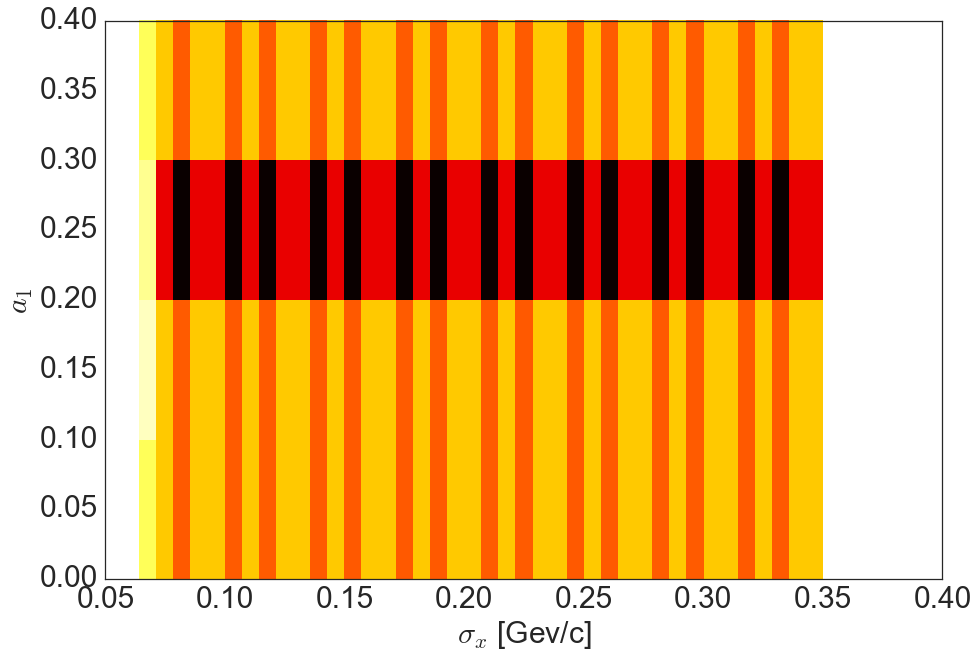

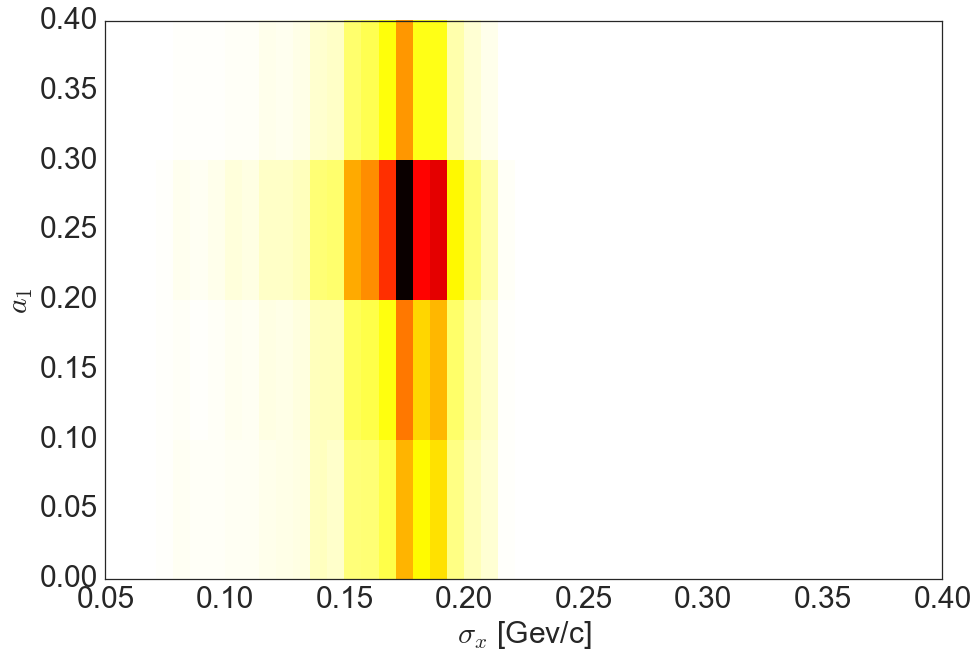

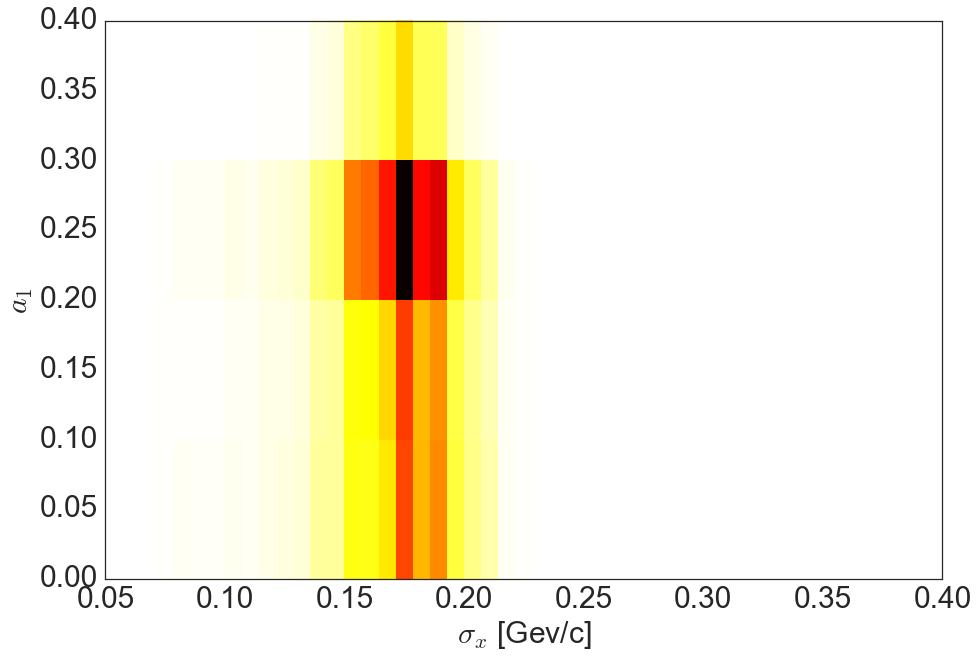

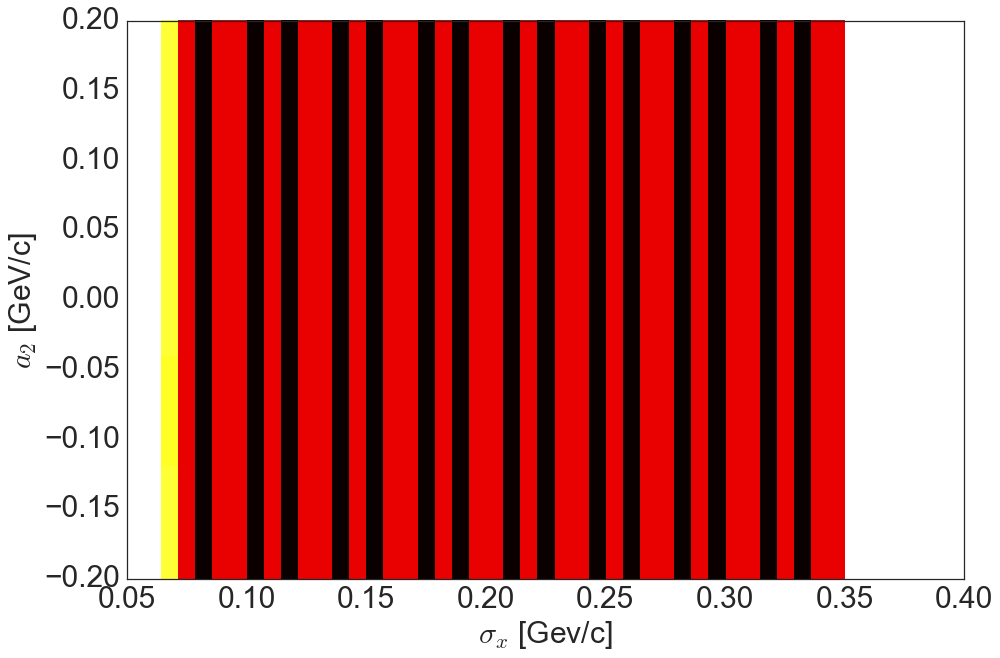

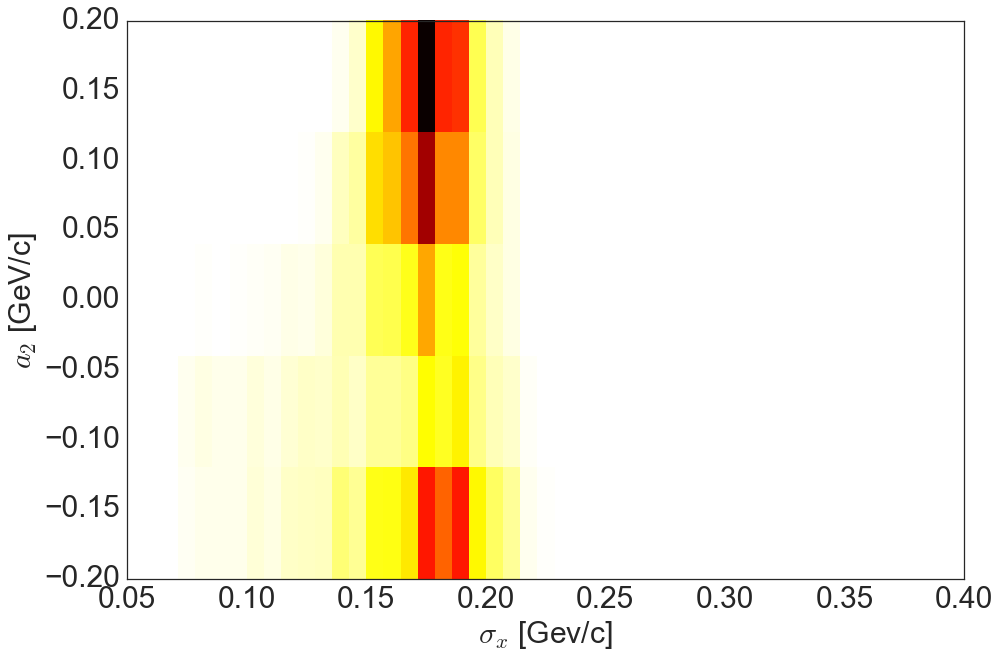

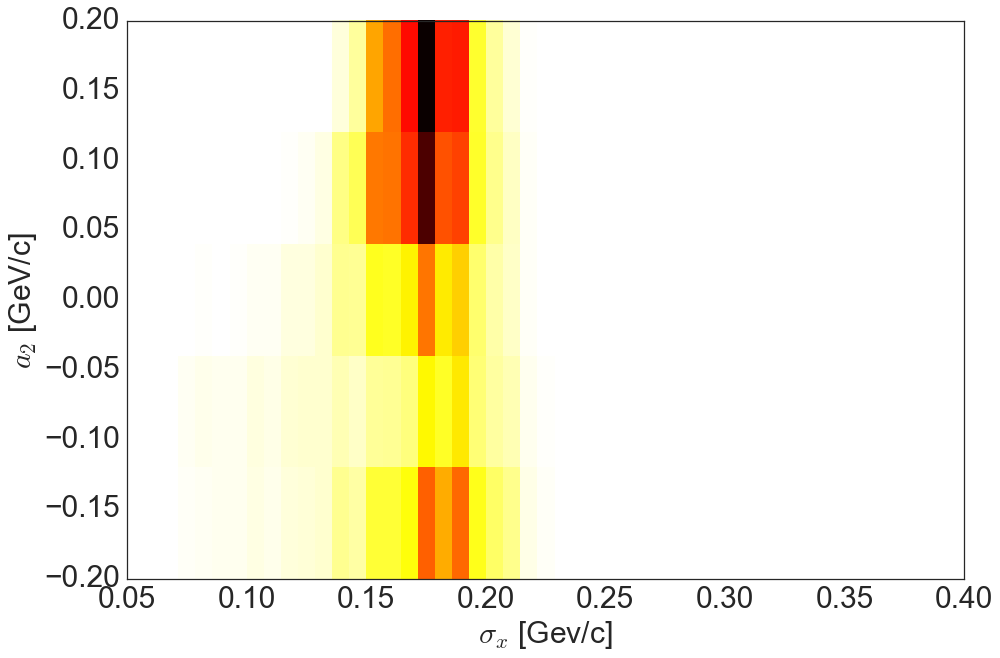

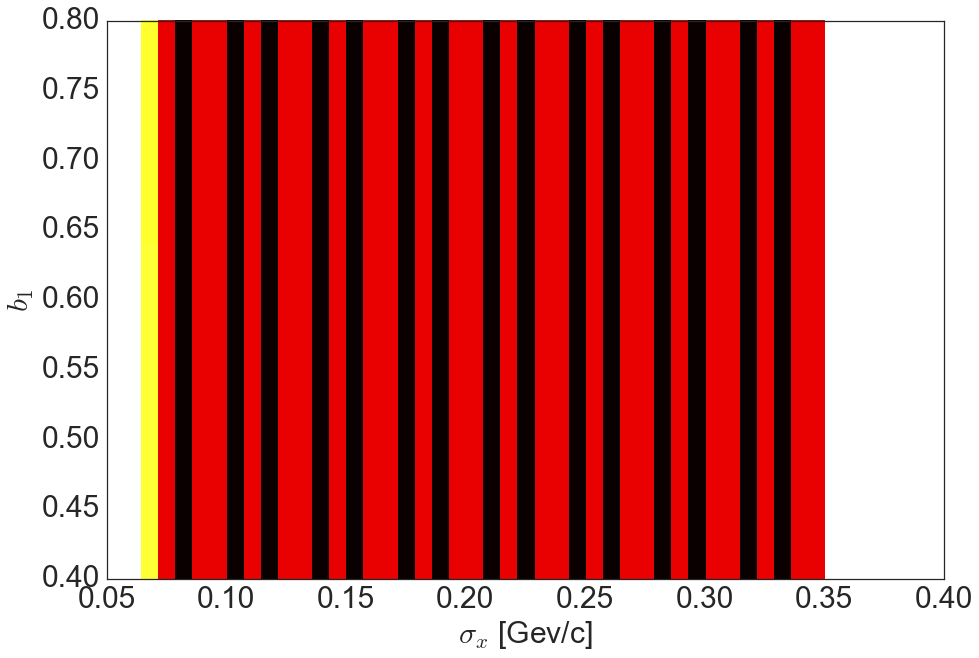

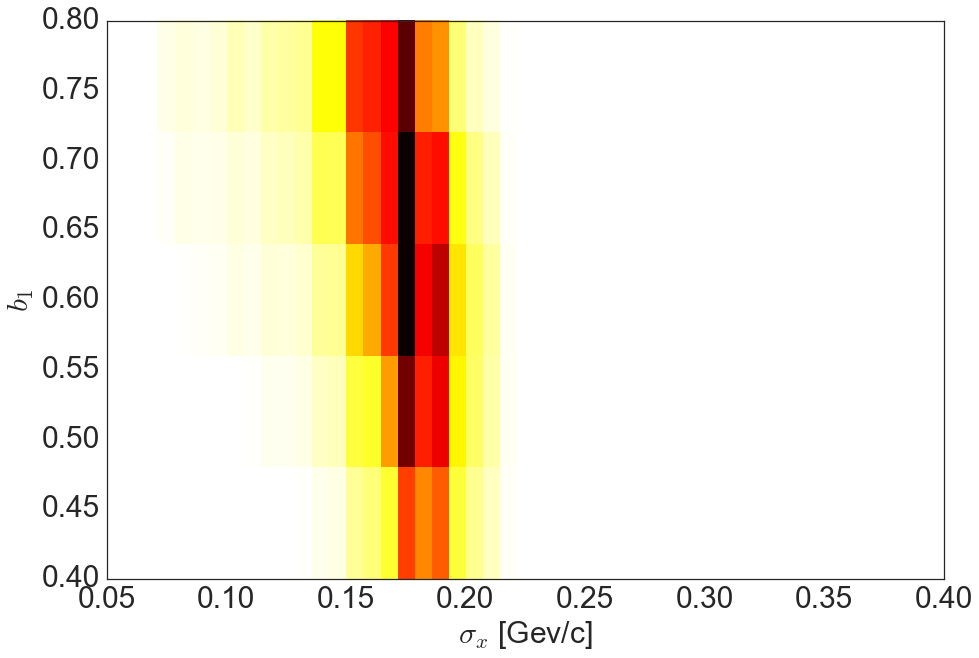

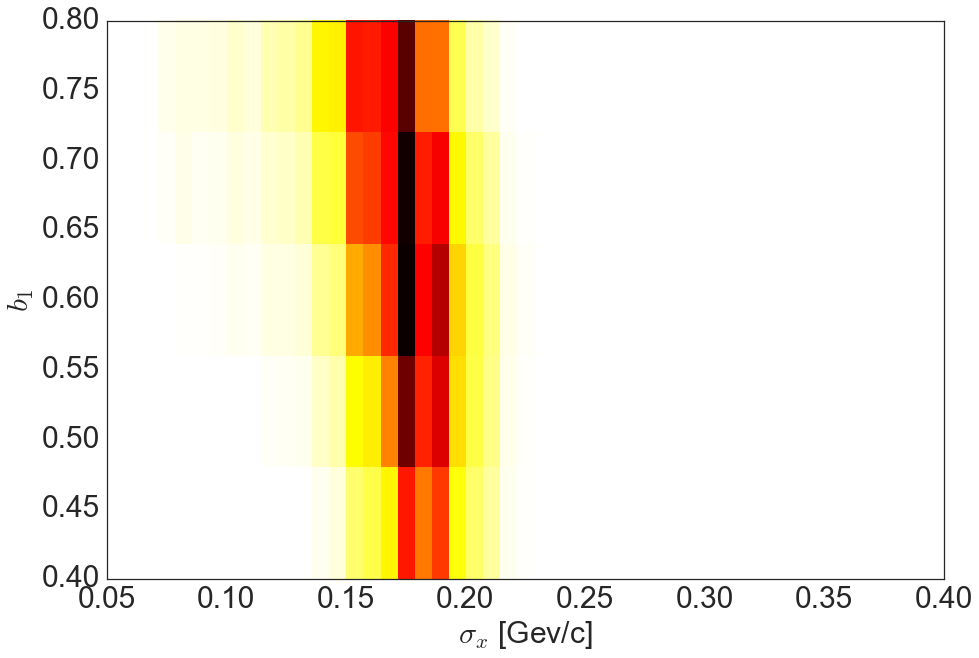

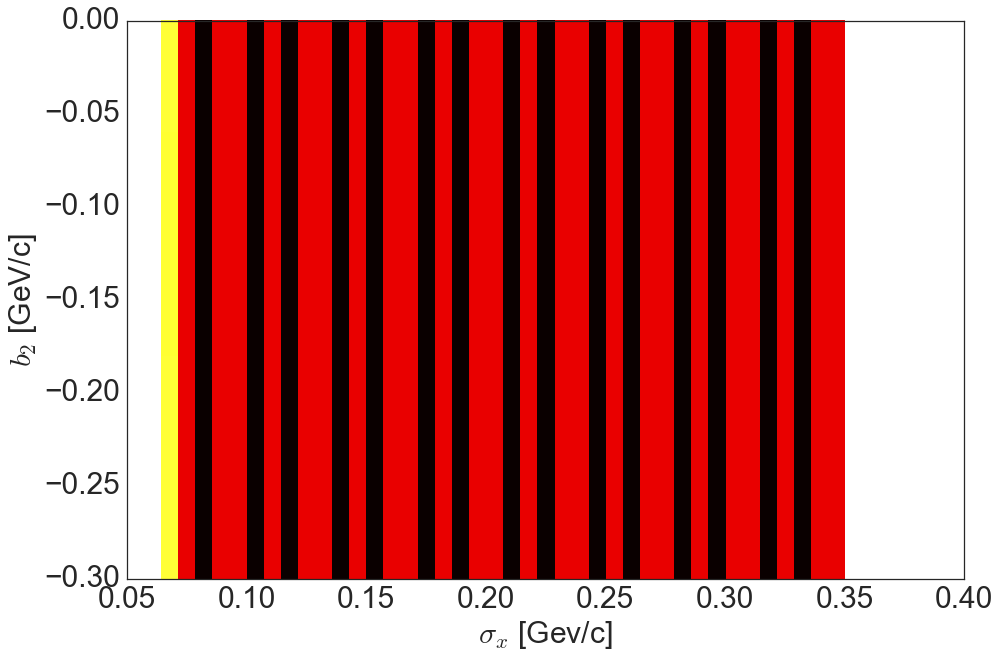

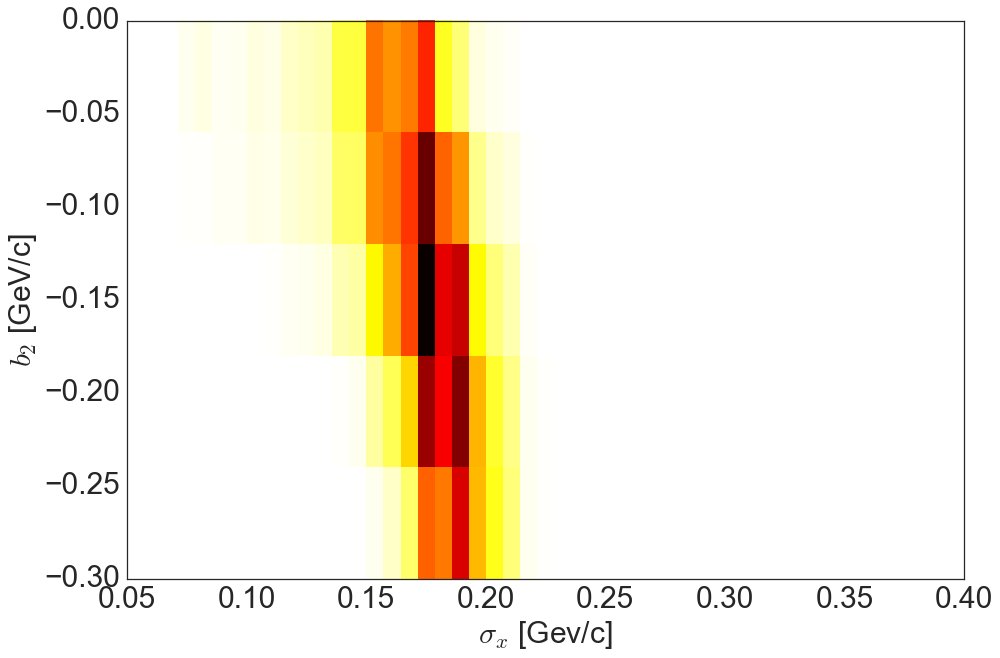

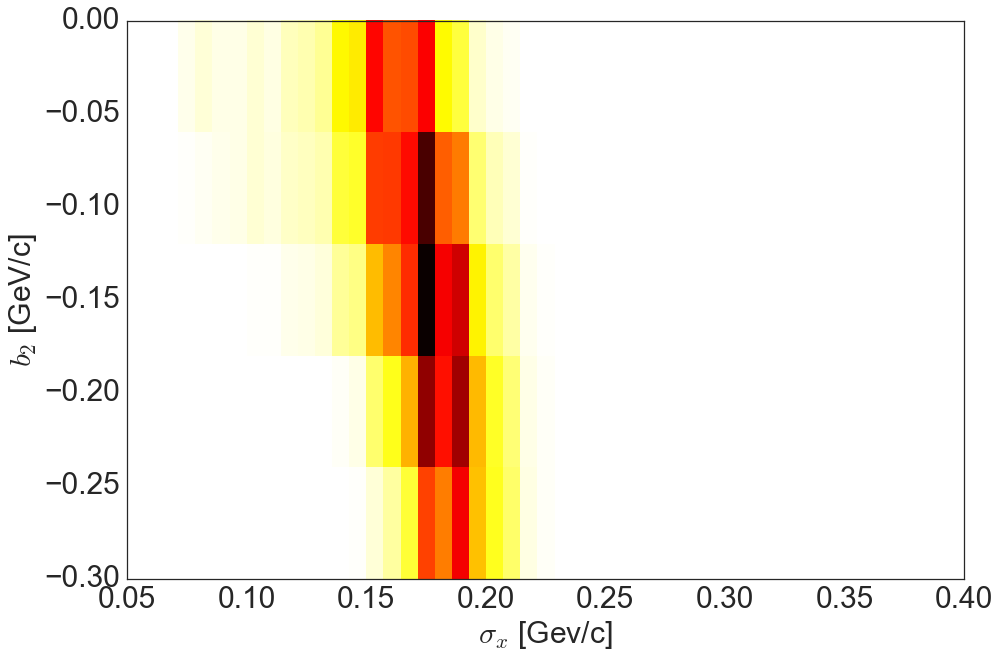

In [8]:
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',target='208Pb',binsy=np.linspace(0.,0.4,5),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',target='208Pb',binsy=np.linspace(-0.2,0.2,6),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',target='208Pb',binsy=np.linspace(0.4,0.8,6),do_save_fig=True)
plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',target='208Pb',binsy=np.linspace(-0.3,0.0,6),do_save_fig=True)

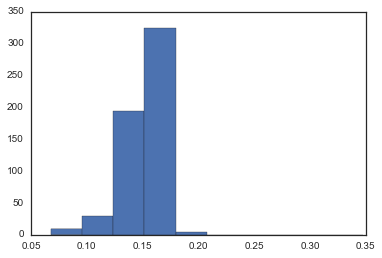

In [17]:
plt.hist(sims.genSigmaX,weights=sims.PvalSigmaTMeanZa1_12C*sims.PvalMeanZa1_unweighted_12C);

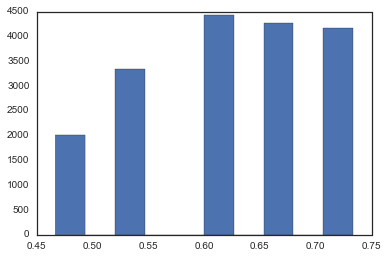

In [16]:
plt.hist(sims.genMeanZa1,weights=sims.PvalMeanZa1_unweighted_12C);

In [ ]:
# draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=30,x_range=(0.1,0.22),target='12C')

draw_PvalWeighting_Fit2Gaussian(var='MeanX',xlabel='$\\mu_{x}$ [GeV/c]',bins=30,x_range=(-0.1,0.1))
draw_PvalWeighting_Fit2Gaussian(var='MeanY',xlabel='$\\mu_{y}$ [GeV/c]',bins=30,x_range=(-0.1,0.1))

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-0.1,1.4),xtext=0.23)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.35,0.85),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$ [GeV/c]',
                                bins=10,legend_loc='upper left',xtext=-0.34,ytext=0.23,do_fit_gaussian=False)

# runs 100,000 to 200,7999

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.3,0.2),do_fit_gaussian=False)

# runs 300,000 to 460,000

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_NsigmaT_1_NSigmaZa1_20_NSigmaZa2_20_NMeanZa1_20_NMeanZa2_20_NRand_10_simulationruns_results.csv')

sum up Pval for only two variables at a time

In [ ]:
PvalMeanZa1MeanZa2 , PvalSigmaZa1SigmaZa2 , PvalSigmaZa1MeanZa2 , PvalSigmaZa2MeanZa1 , PvalSigmaZa1MeanZa1 , PvalSigmaZa2MeanZa2 = [] , [] , [] , [], [], []
for index, row in sims.iterrows():
    if index%10000==0 : print index
    PvalSigmaZa1SigmaZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalSigmaZa2_unweighted ] ) ) 
    PvalMeanZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalMeanZa1_unweighted , row.PvalMeanZa2_unweighted ] ) ) 
    
    PvalSigmaZa1MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa1_unweighted ] ) )    
    PvalSigmaZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa2_unweighted ] ) )
    
    PvalSigmaZa2MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa1_unweighted ] ) )
    PvalSigmaZa2MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa2_unweighted ] ) )
print 'done.'

In [ ]:
sims['PvalSigmaZa1SigmaZa2'] = PvalSigmaZa1SigmaZa2
sims['PvalMeanZa1MeanZa2'] = PvalMeanZa1MeanZa2
sims['PvalSigmaZa1MeanZa1'] = PvalSigmaZa1MeanZa1
sims['PvalSigmaZa1MeanZa2'] = PvalSigmaZa1MeanZa2
sims['PvalSigmaZa2MeanZa1'] = PvalSigmaZa2MeanZa1
sims['PvalSigmaZa2MeanZa2'] = PvalSigmaZa2MeanZa2

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_1sT_20sZa1_20sZa2_20mZa1_20mZa2_10r_results.csv')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15)
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-.1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.55,0.55),do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.,1.2),xtext=0.82,do_fit_gaussian=False,legend_loc='none')
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$',
                                bins=10,x_range=(-0.55,0.55),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
cmaps = ['Blues' , 'Reds' , 'Greens' , 'Purples']

In [ ]:
weights = [None , 'PvalSigmaZa1SigmaZa2' , 'PvalTotal_unweighted' , 'KStPval_avg' ]
draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalMeanZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='MeanZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\mu_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);